# Loading Data

In [2]:
# import the required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import joblib
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost
from tabulate import tabulate
import time
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
city_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon', 'london', 'paris', 'rome']

## Load preprocessed data

In [ ]:
# original data
all_city_df = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/all_cities_data.csv')

<ipython-input-3-ae276320871e>:1: DtypeWarning: Columns (0,2,22,29,41,45,46,54,61,68) have mixed types. Specify dtype option on import or set low_memory=False.
  all_city_df = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/all_cities_data.csv')


In [ ]:
# processed data, split into train and test sets
all_train_data = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/All_Train_Data.csv')
all_test_data = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/All_Test_Data.csv')


In [4]:
# new engineered data
train_df_new = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/All_Train_FinalEng.csv')
test_df_new = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/All_Test_FinalEng.csv')

print(train_df_new.shape)
print(test_df_new.shape)

(485100, 85)
(121490, 85)


In [26]:
scaled_train_data = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/scaled_train_new.csv')
scaled_test_data = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/scaled_test_new.csv')

In [27]:
# model metrics dictionary
import pickle
with open('/content/drive/My Drive/Airbnb_Price_Data/final_model_metrics.pkl','rb') as file:
  model_metrics = pickle.load(file)

ALL TRAINING COLUMNS

In [6]:
train_cols = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                          'host_has_profile_pic', 'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
                          'london', 'paris', 'rome', 'a few days or more',
                          'within a day', 'within a few hours', 'within an hour',
                          'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Entire condo', 'Entire home', 'Entire rental unit', 'Private room in home', 'Private room in rental unit', 'other_prop', 'attr_score',
                          'amenity_ Hair dryer', 'amenity_ Iron', 'amenity_ Dishes and silverware', 'amenity_ Cooking basics', 'amenity_ Refrigerator',
                          'amenity_ Smoke alarm', 'amenity_ Bed linens', 'amenity_ Microwave', 'amenity_ Carbon monoxide alarm', 'amenity_ Dedicated workspace', 'winter', 'spring', 'summer', 'fall','Private room in condo', 'Entire serviced apartment', 'Entire loft', 'Private room in bed and breakfast', 'Room in boutique hotel', 'Room in hotel' ]

In [7]:
train_cols_numer = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                          'host_has_profile_pic', 'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
                          'london', 'paris', 'rome']

In [14]:
print(len(train_cols_numer))
print(len(train_cols))

31
66


# Amsterdam

In [ ]:
from sqlalchemy.sql.expression import false
import glob
# read in data from all cities, label with city
#(source: https://saturncloud.io/blog/how-to-read-multiple-csv-files-into-python-pandas-dataframe/#:~:text=To%20read%20multiple%20CSV%20files%20into%20a%20single%20dataframe%2C%20we,the%20concat%20function%20from%20Pandas.&text=Here's%20what%20the%20code%20does,CSV%20files%20in%20a%20directory.)
# Get a list of all CSV files in a directory
ams_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Amsterdam_Prices/*.csv')

# Create an empty dataframe to store the combined data
ams_df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in ams_csv_files:
    df = pd.read_csv(csv_file)
    ams_df = pd.concat([ams_df, df])

# add column for city name
ams_df['city'] = 'amsterdam'



# Athens

In [ ]:
ath_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Athens_Prices/*.csv')

# Create an empty dataframe to store the combined data
ath_df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in ath_csv_files:
    df = pd.read_csv(csv_file)
    ath_df = pd.concat([ath_df, df])

# add column for city name
ath_df['city'] = 'athens'

# Barcelona

In [ ]:
bar_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Barcelona_Prices/*.csv')

bar_df = pd.DataFrame()

for csv_file in bar_csv_files:
    df = pd.read_csv(csv_file)
    bar_df = pd.concat([bar_df, df])

# add column for city name
bar_df['city'] = 'barcelona'

# Berlin

In [ ]:
ber_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Berlin_Prices/*.csv')

ber_df = pd.DataFrame()

for csv_file in ber_csv_files:
    df = pd.read_csv(csv_file)
    ber_df = pd.concat([ber_df, df])

# add column for city name
ber_df['city'] = 'berlin'

# Dublin

In [ ]:
dub_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Dublin_Prices/*.csv')

dub_df = pd.DataFrame()

for csv_file in dub_csv_files:
    df = pd.read_csv(csv_file)
    dub_df = pd.concat([dub_df, df])

# add column for city name
dub_df['city'] = 'dublin'

# Lisbon

In [ ]:
lis_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Lisbon_Prices/*.csv')

lis_df = pd.DataFrame()

for csv_file in lis_csv_files:
    df = pd.read_csv(csv_file)
    lis_df = pd.concat([lis_df, df])

# add column for city name
lis_df['city'] = 'lisbon'

# London

In [ ]:
lon_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/London_Prices/*.csv')

lon_df = pd.DataFrame()

for csv_file in lon_csv_files:
    df = pd.read_csv(csv_file)
    lon_df = pd.concat([lon_df, df])

# add column for city name
lon_df['city'] = 'london'

# Paris

In [ ]:
par_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Paris_Prices/*.csv')

par_df = pd.DataFrame()

for csv_file in par_csv_files:
    df = pd.read_csv(csv_file)
    par_df = pd.concat([par_df, df])

# add column for city name
par_df['city'] = 'paris'

# Rome

In [ ]:
rom_csv_files = glob.glob('/content/drive/My Drive/Airbnb_Price_Data/Rome_Prices/*.csv')

rom_df = pd.DataFrame()

for csv_file in rom_csv_files:
    df = pd.read_csv(csv_file)
    rom_df = pd.concat([rom_df, df])

# add column for city name
rom_df['city'] = 'rome'

# Combined City Data

In [ ]:
# put all data together
all_city_df = pd.concat([ams_df, ath_df, bar_df, ber_df, dub_df, lis_df, lon_df, par_df, rom_df])

print(all_city_df.shape)

# convert price
all_city_df['price'] = all_city_df['price'].str.replace('$','').str.replace(',','').astype('float')


(764993, 76)


<ipython-input-32-09a7b19fe837>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_city_df['price'] = all_city_df['price'].str.replace('$','').str.replace(',','').astype('float')


Save Full Dataset

In [ ]:
all_city_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/all_cities_data.csv', index=False)

# Train/Test Split

In [ ]:
# remove unhelpful columns
# all_city_data = all_city_data.drop(all_city_data.columns[0], axis=1)
all_city_df= all_city_df.drop(['listing_url', 'scrape_id', 'source', 'picture_url', 'host_id', 'host_url', 'host_name',
                                    'host_location', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
                                    'host_total_listings_count', 'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
                                    'neighbourhood_cleansed', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                                    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                                    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30',
                                    'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'license', 'calculated_host_listings_count_entire_homes',
                                    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_about', 'first_review', 'last_review'], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
train_data = all_city_df.copy()
# source https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
train_ratio = 0.8
test_ratio = 0.2

x =  train_data.loc[:, train_data.columns != 'price']
y = train_data['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.8)


In [ ]:
# combine x_train, y_train
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(611994, 35)
(152999, 35)


In [ ]:
# save train/test split
train_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/train_df_initial.csv', index=False)
test_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/test_df_initial.csv', index=False)

In [ ]:
og_train = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/train_df_initial.csv')
og_train.shape

(611994, 36)

In [ ]:
og_test = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/test_df_initial.csv')
og_test.shape

(152999, 36)

# Data Exploration

In [ ]:
train_df.head(8)

id last_scraped  \
15671            18582490   2023-06-08   
11149            52976053   2023-06-10   
7888   928088220090700371   2023-09-03   
10017  736184621212894214   2023-03-27   
2203              4164433   2023-03-15   
669               1575295   2022-09-16   
7713              7669739   2022-12-11   
44470  635310471759670270   2023-03-15   

                                                    name  \
15671  Condo in Paris · ★4.75 · 1 bedroom · 1 bed · 1...   
11149   Condo in Barcelona · 1 bedroom · 1 bed · 2 baths   
7888   Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
10017  Top floor apartment at Petrolona with big balcony   
2203                  Quadruple comfortable room private   
669    Central quiet cosy - private bathroom with shower   
7713                  Nice studio with Eiffel tower view   
44470        Cosy flat, close to amazing Buttes Chaumont   

                                             description  \
15671  Home in Paris, a place where you belong.<br />...   
11149  The apartment is located in El Born, a 3-minut...   
7888   Plezier met het hele gezin in deze stijlvolle ...   
10017  Enjoy a stylish flat with a big balcony at thi...   
2203   Quadruple room, private bathroom, free wifi, r...   
669    I let a room in our big flat. We live very cen...   
7713   Le studio fait 13m2 et a une belle vue sur la ...   
44470  Beautiful flat two minutes walk from the Butte...   

                                   neighborhood_overview  host_since  \
15671                                                NaN  2015-06-15   
11149                                                NaN  2014-11-25   
7888                                                 NaN  2012-07-03   
10017  Petralona is close to Thiseio and to the Acrop...  2012-09-27   
2203                                                 NaN  2014-09-18   
669    Mitte is one of the most exicting areas in Ber...  2013-08-25   
7713                                                 NaN  2013-08-04   
44470                                                NaN  2014-06-20   

       host_response_time host_response_rate host_acceptance_rate  \
15671                 NaN                NaN                  NaN   
11149                 NaN                NaN                 100%   
7888   within a few hours               100%                 100%   
10017      within an hour               100%                 100%   
2203                  NaN                NaN                  NaN   
669        within an hour                92%                 100%   
7713                  NaN                NaN                  NaN   
44470        within a day               100%                  70%   

      host_is_superhost host_has_profile_pic host_identity_verified  \
15671               NaN                    t                      t   
11149                 f                    t                      f   
7888                  f                    t                      t   
10017                 t                    t                      t   
2203                  f                    t                      t   
669                   f                    t                      t   
7713                  f                    t                      t   
44470                 f                    t                      t   

        latitude  longitude                property_type        room_type  \
15671  48.850380   2.299240        Private room in condo     Private room   
11149  41.385140   2.181040                 Entire condo  Entire home/apt   
7888   52.345002   4.867506           Entire rental unit  Entire home/apt   
10017  37.966940  23.704940                 Entire condo  Entire home/apt   
2203   41.903620  12.494630  Private room in rental unit     Private room   
669    52.532290  13.396910  Private room in rental unit     Private room   
7713   48.851430   2.290410           Entire rental unit  Entire home/apt   
44470  48.879190   2.389550        

In [ ]:
x_train.columns

Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city'],
      dtype='object')

In [ ]:
x_train['city'].unique()

array(['paris', 'barcelona', 'amsterdam', 'athens', 'rome', 'berlin',
       'lisbon', 'london', 'dublin'], dtype=object)

In [ ]:
x_train[x_train['property_type'] == 'Windmill']

id last_scraped  \
2303              7857433   2023-06-13   
1447              5004250   2023-06-13   
12775            44206551   2022-12-16   
5609   625050799202030572   2023-03-19   
8802             28330299   2022-12-16   
...                   ...          ...   
19446            24419048   2022-09-13   
831               1929751   2022-12-16   
10362            34040330   2022-12-16   
5804             28330299   2023-03-19   
623               1929751   2023-06-13   

                                                    name  \
2303   Windmill in Mafra · ★4.81 · 2 bedrooms · 2 bed...   
1447   Windmill in Ericeira · ★4.97 · 1 bedroom · 1 b...   
12775                                   Moinho da Amélia   
5609                  Windmill of Wonders - Moinho Velho   
8802                                     Moinho do Guião   
...                                                  ...   
19446  Cozy 1850s Windmill with City and River Sunset...   
831                               The Windhouse - Moinho   
10362                             West Windmill Portugal   
5804                                     Moinho do Guião   
623    Windmill in São Bartolomeu de Galegos · ★5.0 ·...   

                                             description  \
2303   This typical Portuguese Windmill is located in...   
1447   The Windmill is a 500 years old mill entirely ...   
12775  Includes the windmill, wooden cabin, swimming ...   
5609   Charming rustic windmill located up on a hill ...   
8802   Moinho de Vento familiar restaurado. Situado e...   
...                                                  ...   
19446  Climb the curving staircase in a historic wind...   
831    O The Windhouse é um moinho de vento, totalmen...   
10362  Located in a quiet village in the middle of We...   
5804   Moinho de Vento familiar restaurado. Situado e...   
623    O The Windhouse é um moinho de vento, totalmen...   

                                   neighborhood_overview  host_since  \
2303                      Quiet area, rural environment.  2015-08-10   
1447   Quiet and family neighbourhood at a 5 minutes ...  2015-01-08   
12775                                                NaN  2020-07-13   
5609   Literally no direct neighbours. First House 15...  2019-12-15   
8802   Situado na periferia da aldeia de Alvarinhos, ...  2018-07-19   
...                                                  ...         ...   
19446  The windmill is on the south bank of the Tejo ...  2018-04-08   
831                                                  NaN  2013-11-13   
10362  Location just 5 minutes from Dinosaurs Park, 1...  2018-06-01   
5804   Situado na periferia da aldeia de Alvarinhos, ...  2018-07-19   
623                                                  NaN  2013-11-13   

       host_response_time host_response_rate host_acceptance_rate  \
2303                  NaN                NaN                  NaN   
1447       within an hour               100%                 100%   
12775      within an hour               100%                 100%   
5609       within an hour               100%                 100%   
8802         within a day               100%                  90%   
...                   ...                ...                  ...   
19446      within an hour               100%                  99%   
831        within an hour               100%                  38%   
10362      within an hour               100%                 100%   
5804         within a day               100%                  93%   
623    within a few hours               100%                  50%   

      host_is_superhost host_has_profile_pic host_identity_verified  latitude  \
2303                  f                    t                      t  38.95733   
1447                  t                    t                      t  38.96658   
12775                 f                    t                      t  39.18975   
5609                  f                    t              

# Descriptive Statistics

In [ ]:
# look at null counts and data types
print(x_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611994 entries, 15671 to 46998
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              611994 non-null  int64  
 1   last_scraped                    611994 non-null  object 
 2   name                            611809 non-null  object 
 3   description                     604563 non-null  object 
 4   neighborhood_overview           354062 non-null  object 
 5   host_since                      611881 non-null  object 
 6   host_response_time              418264 non-null  object 
 7   host_response_rate              418264 non-null  object 
 8   host_acceptance_rate            450696 non-null  object 
 9   host_is_superhost               563233 non-null  object 
 10  host_has_profile_pic            611881 non-null  object 
 11  host_identity_verified          611881 non-null  object 
 12  latitude     

## Check null counts

In [ ]:
x_train.isnull().sum()

id                                     0
last_scraped                           0
name                                 212
description                         7383
neighborhood_overview             258170
host_since                           121
host_response_time                193620
host_response_rate                193620
host_acceptance_rate              161314
host_is_superhost                  48748
host_has_profile_pic                 121
host_identity_verified               121
latitude                               0
longitude                              0
property_type                          0
room_type                              0
accommodates                           0
bathrooms_text                       909
bedrooms                           89904
beds                                8274
amenities                              0
number_of_reviews                      0
number_of_reviews_ltm                  0
number_of_reviews_l30d                 0
review_scores_ra

## Descriptive Statistics (Mean, Quartiles, Min/Max) of Training Data

In [ ]:
train_df.describe().transpose()

count          mean           std  \
id                              611994.0  2.028737e+17  3.282031e+17   
latitude                        611994.0  4.730420e+01  5.306596e+00   
longitude                       611994.0  3.339845e+00  8.050390e+00   
accommodates                    611994.0  3.276215e+00  1.959681e+00   
bedrooms                        522299.0  1.549442e+00  9.717451e-01   
beds                            603711.0  1.954412e+00  1.494344e+00   
number_of_reviews               611994.0  3.307786e+01  6.832587e+01   
number_of_reviews_ltm           611994.0  9.448271e+00  1.881808e+01   
number_of_reviews_l30d          611994.0  7.707298e-01  1.692527e+00   
review_scores_rating            494663.0  4.629603e+00  6.461984e-01   
review_scores_accuracy          489587.0  4.741363e+00  4.299649e-01   
review_scores_cleanliness       489642.0  4.647412e+00  4.928900e-01   
review_scores_checkin           489458.0  4.794034e+00  4.009561e-01   
review_scores_communication     489596.0  4.803121e+00  4.026773e-01   
review_scores_location          489455.0  4.749572e+00  3.733287e-01   
review_scores_value             489429.0  4.605927e+00  4.701009e-01   
calculated_host_listings_count  611994.0  1.360518e+01  4.403598e+01   
reviews_per_month               494662.0  1.183669e+00  1.571465e+00   
price                           611994.0  1.730360e+02  8.343102e+02   

                                       min           25%           50%  \
id                              2737.00000  1.852177e+07  3.697478e+07   
latitude                          37.93483  4.188115e+01  4.887894e+01   
longitude                         -9.49852 -1.577400e-01  2.258320e+00   
accommodates                       0.00000  2.000000e+00  2.000000e+00   
bedrooms                           1.00000  1.000000e+00  1.000000e+00   
beds                               1.00000  1.000000e+00  1.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  7.000000e+00   
number_of_reviews_ltm              0.00000  0.000000e+00  2.000000e+00   
number_of_reviews_l30d             0.00000  0.000000e+00  0.000000e+00   
review_scores_rating               0.00000  4.550000e+00  4.800000e+00   
review_scores_accuracy             0.00000  4.670000e+00  4.870000e+00   
review_scores_cleanliness          0.00000  4.500000e+00  4.800000e+00   
review_scores_checkin              0.00000  4.750000e+00  4.920000e+00   
review_scores_communication        0.00000  4.770000e+00  4.940000e+00   
review_scores_location             0.00000  4.670000e+00  4.860000e+00   
review_scores_value                0.00000  4.500000e+00  4.710000e+00   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  6.500000e-01   
price                              0.00000  6.200000e+01  1.000000e+02   

                                         75%           max  
id                              6.013579e+17  9.722182e+17  
latitude                        5.152702e+01  5.362349e+01  
longitude                       4.895677e+00  2.380661e+01  
accommodates                    4.000000e+00  1.600000e+01  
bedrooms                        2.000000e+00  5.000000e+01  
beds                            2.000000e+00  9.000000e+01  
number_of_reviews               3.200000e+01  3.199000e+03  
number_of_reviews_ltm           1.100000e+01  1.689000e+03  
number_of_reviews_l30d          1.000000e+00  1.510000e+02  
review_scores_rating            5.000000e+00  5.000000e+00  
review_scores_accuracy          5.000000e+00  5.000000e+00  
review_scores_cleanliness       4.980000e+00  5.000000e+00  
review_scores_checkin           5.000000e+00  5.000000e+00  
review_scores_communication     5.000000e+00  5.000000e+00  
review_scores_location          5.000000e+00  5.000000e+00  
review_scores_value             4.890000e+00  5.000000e+00  
calculated_host_listings_count  6.000000e+00  5.430000e+02  
reviews_per_mon

<Axes: xlabel='city', ylabel='price'>

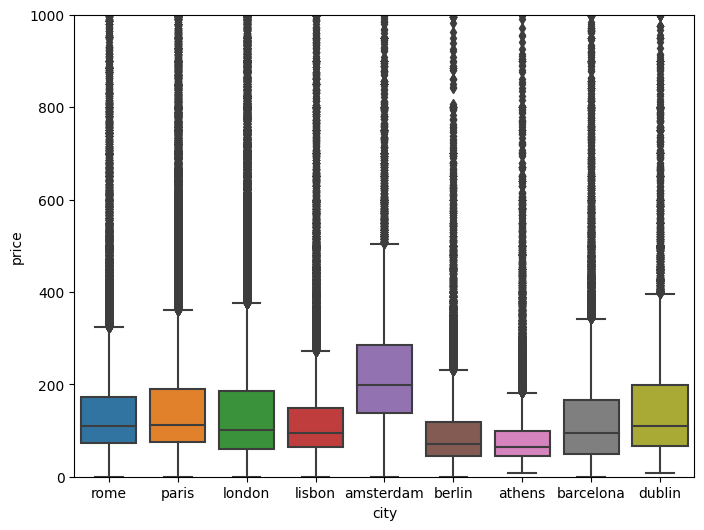

In [ ]:
plt.figure(figsize=(8, 6))
plt.ylim((0, 1000))
sns.boxplot(data=train_df, x = 'city', y = 'price')

# Removing Outliers, Converting Types, Null Imputation

In [ ]:
# remove high price outliers
train_df = train_df.loc[(train_df['price'] <= 600) & (train_df['price'] > 10)]
test_df = test_df.loc[(test_df['price'] <= 600) & (test_df['price'] > 10)]
train_df.describe().transpose()

count          mean           std  \
id                              485100.0  1.667961e+17  3.011936e+17   
host_response_rate              485100.0  9.664929e+01  1.208047e+01   
host_acceptance_rate            485100.0  9.007497e+01  1.990830e+01   
host_is_superhost               485100.0  2.075778e-01  4.055732e-01   
host_has_profile_pic            485100.0  9.885034e-01  1.066042e-01   
host_identity_verified          485100.0  8.916162e-01  3.108649e-01   
latitude                        485100.0  4.709313e+01  5.391481e+00   
longitude                       485100.0  3.410687e+00  8.255661e+00   
accommodates                    485100.0  3.259237e+00  1.866349e+00   
bathrooms_text                  485100.0  1.245130e+00  6.174307e-01   
bedrooms                        485100.0  1.439771e+00  8.581884e-01   
beds                            485100.0  1.940802e+00  1.411830e+00   
number_of_reviews               485100.0  4.123698e+01  7.427789e+01   
number_of_reviews_ltm           485100.0  1.177209e+01  2.040308e+01   
number_of_reviews_l30d          485100.0  9.619233e-01  1.845502e+00   
review_scores_rating            485100.0  4.630390e+00  6.434823e-01   
review_scores_accuracy          485100.0  4.742780e+00  4.236843e-01   
review_scores_cleanliness       485100.0  4.647492e+00  4.878675e-01   
review_scores_checkin           485100.0  4.795557e+00  3.938255e-01   
review_scores_communication     485100.0  4.804814e+00  3.955378e-01   
review_scores_location          485100.0  4.748677e+00  3.698381e-01   
review_scores_value             485100.0  4.607534e+00  4.644159e-01   
instant_bookable                485100.0  3.702577e-01  4.828741e-01   
calculated_host_listings_count  485100.0  1.080387e+01  3.279286e+01   
reviews_per_month               485100.0  1.191259e+00  1.579263e+00   
price                           485100.0  1.293792e+02  9.808526e+01   

                                       min           25%           50%  \
id                              2737.00000  1.752429e+07  3.413128e+07   
host_response_rate                 0.00000  1.000000e+02  1.000000e+02   
host_acceptance_rate               0.00000  9.200000e+01  9.900000e+01   
host_is_superhost                  0.00000  0.000000e+00  0.000000e+00   
host_has_profile_pic               0.00000  1.000000e+00  1.000000e+00   
host_identity_verified             0.00000  1.000000e+00  1.000000e+00   
latitude                          37.93483  4.185743e+01  4.887411e+01   
longitude                         -9.49852 -1.579600e-01  2.288195e+00   
accommodates                       1.00000  2.000000e+00  3.000000e+00   
bathrooms_text                     0.00000  1.000000e+00  1.000000e+00   
bedrooms                           1.00000  1.000000e+00  1.000000e+00   
beds                               1.00000  1.000000e+00  2.000000e+00   
number_of_reviews                  0.00000  4.000000e+00  1.300000e+01   
number_of_reviews_ltm              0.00000  0.000000e+00  4.000000e+00   
number_of_reviews_l30d             0.00000  0.000000e+00  0.000000e+00   
review_scores_rating               0.00000  4.550000e+00  4.800000e+00   
review_scores_accuracy             0.00000  4.670000e+00  4.870000e+00   
review_scores_cleanliness          0.00000  4.510000e+00  4.800000e+00   
review_scores_checkin              0.00000  4.760000e+00  4.920000e+00   
review_scores_communication        0.00000  4.780000e+00  4.940000e+00   
review_scores_location             0.00000  4.670000e+00  4.850000e+00   
review_scores_value                0.00000  4.500000e+00  4.710000e+00   
instant_bookable                   0.00000  0.000000e+00  0.000000e+00   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  6.600000e-01   
price                             11.00000  6.200000e+01  1.000000e+02   

                                         75%           max  
id                            

In [ ]:
# remove nulls for review scores
train_df = train_df.dropna(subset = ['review_scores_rating'])
train_df.describe().transpose()

count          mean           std  \
id                              485100.0  1.667961e+17  3.011936e+17   
host_response_rate              347376.0  9.532084e+01  1.405637e+01   
host_acceptance_rate            376653.0  8.750526e+01  2.192984e+01   
host_is_superhost               485100.0  2.075778e-01  4.055732e-01   
host_has_profile_pic            485100.0  9.885034e-01  1.066042e-01   
host_identity_verified          485100.0  8.916162e-01  3.108649e-01   
latitude                        485100.0  4.709313e+01  5.391481e+00   
longitude                       485100.0  3.410687e+00  8.255661e+00   
accommodates                    485100.0  3.259237e+00  1.866349e+00   
bathrooms_text                  483589.0  1.245896e+00  6.182422e-01   
bedrooms                        414014.0  1.515280e+00  9.077633e-01   
beds                            479632.0  1.940127e+00  1.419841e+00   
number_of_reviews               485100.0  4.123698e+01  7.427789e+01   
number_of_reviews_ltm           485100.0  1.177209e+01  2.040308e+01   
number_of_reviews_l30d          485100.0  9.619233e-01  1.845502e+00   
review_scores_rating            485100.0  4.630390e+00  6.434823e-01   
review_scores_accuracy          480157.0  4.742780e+00  4.258595e-01   
review_scores_cleanliness       480212.0  4.647492e+00  4.903441e-01   
review_scores_checkin           480028.0  4.795557e+00  3.959006e-01   
review_scores_communication     480166.0  4.804814e+00  3.975648e-01   
review_scores_location          480025.0  4.748677e+00  3.717880e-01   
review_scores_value             479999.0  4.607534e+00  4.668771e-01   
instant_bookable                485100.0  3.702577e-01  4.828741e-01   
calculated_host_listings_count  485100.0  1.080387e+01  3.279286e+01   
reviews_per_month               485099.0  1.191259e+00  1.579264e+00   
price                           485100.0  1.293792e+02  9.808526e+01   

                                       min           25%           50%  \
id                              2737.00000  1.752429e+07  3.413128e+07   
host_response_rate                 0.00000  9.900000e+01  1.000000e+02   
host_acceptance_rate               0.00000  8.500000e+01  9.900000e+01   
host_is_superhost                  0.00000  0.000000e+00  0.000000e+00   
host_has_profile_pic               0.00000  1.000000e+00  1.000000e+00   
host_identity_verified             0.00000  1.000000e+00  1.000000e+00   
latitude                          37.93483  4.185743e+01  4.887411e+01   
longitude                         -9.49852 -1.579600e-01  2.288195e+00   
accommodates                       1.00000  2.000000e+00  3.000000e+00   
bathrooms_text                     0.00000  1.000000e+00  1.000000e+00   
bedrooms                           1.00000  1.000000e+00  1.000000e+00   
beds                               1.00000  1.000000e+00  2.000000e+00   
number_of_reviews                  0.00000  4.000000e+00  1.300000e+01   
number_of_reviews_ltm              0.00000  0.000000e+00  4.000000e+00   
number_of_reviews_l30d             0.00000  0.000000e+00  0.000000e+00   
review_scores_rating               0.00000  4.550000e+00  4.800000e+00   
review_scores_accuracy             0.00000  4.670000e+00  4.870000e+00   
review_scores_cleanliness          0.00000  4.500000e+00  4.800000e+00   
review_scores_checkin              0.00000  4.760000e+00  4.920000e+00   
review_scores_communication        0.00000  4.770000e+00  4.940000e+00   
review_scores_location             0.00000  4.670000e+00  4.860000e+00   
review_scores_value                0.00000  4.500000e+00  4.720000e+00   
instant_bookable                   0.00000  0.000000e+00  0.000000e+00   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  6.600000e-01   
price                             11.00000  6.200000e+01  1.000000e+02   

                                         75%           max  
id                            

In [ ]:
# price analysis by city
train_df.groupby('city')['price', 'review_scores_rating', 'bedrooms', 'beds', 'number_of_reviews'].mean()

<ipython-input-51-b13a21d984d1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_df.groupby('city')['price', 'review_scores_rating', 'bedrooms', 'beds', 'number_of_reviews'].mean()


price  review_scores_rating  bedrooms      beds  \
city                                                              
amsterdam  240.482303              4.821849  1.613615  1.847620   
athens     106.662580              4.726492  1.476242  2.081080   
barcelona  156.866088              4.528482  1.834472  2.416936   
berlin     103.735287              4.655116  1.327966  1.785477   
dublin     190.025431              4.598861  1.618505  1.828834   
lisbon     147.325148              4.630279  1.784398  2.525927   
london     182.356932              4.589161  1.583204  1.778291   
paris      180.531887              4.615174  1.387670  1.721038   
rome       227.203299              4.679185  1.520978  2.242325   

           number_of_reviews  
city                          
amsterdam          47.489818  
athens             46.823333  
barcelona          42.665487  
berlin             31.585469  
dublin             31.796783  
lisbon             57.540894  
london             17.930000  
paris              24.732402  
rome               53.089161

<Axes: xlabel='city', ylabel='price'>

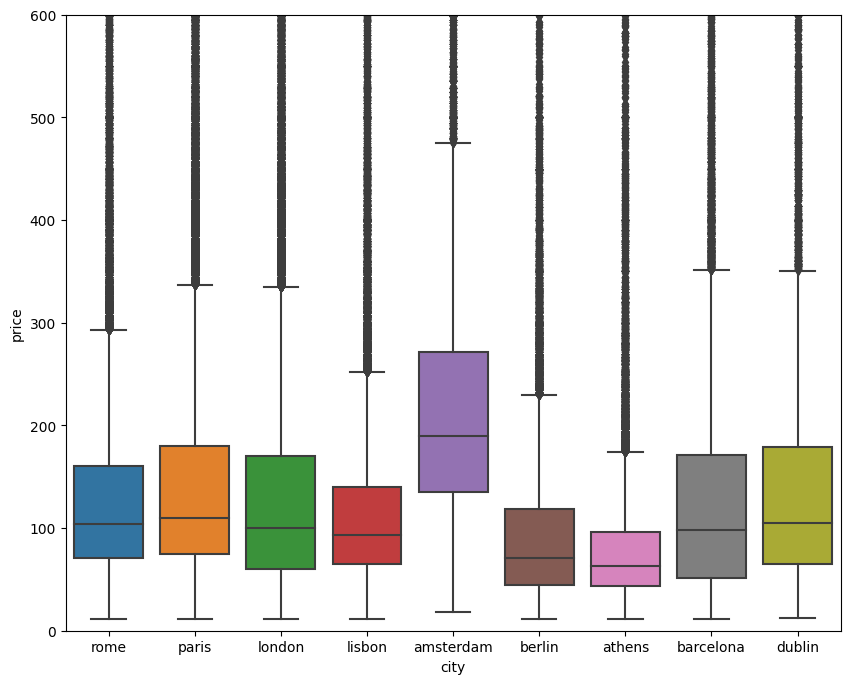

In [ ]:
# new plot after outlier / null removal
plt.figure(figsize=(10, 8))
plt.ylim((0, 600))
sns.boxplot(data=train_df, x = 'city', y = 'price')

## Exploring Categorical/String variables to convert

In [ ]:
# values of categorical variables
print(train_df['host_response_time'].unique())
print(train_df['room_type'].unique())
print(train_df['host_is_superhost'].unique())
print(train_df['bathrooms_text'].unique())

['within an hour' nan 'within a few hours' 'within a day'
 'a few days or more']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
['f' nan 't']
['1 bath' '1 private bath' '1 shared bath' '1.5 baths' 'Private half-bath'
 '2 baths' '1.5 shared baths' '3 baths' '0 shared baths' '2 shared baths'
 '2.5 baths' '3 shared baths' '3.5 baths' 'Shared half-bath' nan
 '10 shared baths' '6 baths' '2.5 shared baths' '0 baths'
 '3.5 shared baths' '4 baths' '5 baths' '4.5 baths' 'Half-bath'
 '7.5 baths' '6 shared baths' '5.5 baths' '5 shared baths' '9.5 baths'
 '8 baths' '6.5 baths' '4 shared baths' '50 baths' '49.5 baths'
 '10.5 baths' '7 baths' '4.5 shared baths' '8 shared baths'
 '6.5 shared baths' '8.5 shared baths' '14 baths' '9 baths'
 '5.5 shared baths' '8.5 baths' '7 shared baths' '12 baths'
 '11 shared baths' '12.5 baths' '12 shared baths' '24 baths']


In [ ]:
train_df['host_response_time'].describe()

count             347519
unique                 4
top       within an hour
freq              248385
Name: host_response_time, dtype: object

In [ ]:
# changes to category type
train_df['city'] = train_df['city'].astype('category')
train_df['host_response_time'] = train_df['host_response_time'].astype('category')
train_df['room_type'] = train_df['room_type'].astype('category')

# changes to numerical (percents to just number)
train_df['host_response_rate'] = train_df['host_response_rate'].str.replace('%','').astype('float')
train_df['host_acceptance_rate'] = train_df['host_acceptance_rate'].str.replace('%','').astype('float')

# booleans
train_df['host_is_superhost'] = train_df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
train_df['host_has_profile_pic'] = train_df['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
train_df['host_identity_verified'] = train_df['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)
train_df['instant_bookable'] = train_df['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

# get number from bathrooms_text
train_df['bathrooms_text'] = train_df['bathrooms_text'].str.extract('(\d+\.\d+|\d+)').astype(float)


In [ ]:
# update test data too

# changes to category type RERUN
test_df['city'] = test_df['city'].astype('category')
test_df['host_response_time'] = test_df['host_response_time'].astype('category')
test_df['room_type'] = test_df['room_type'].astype('category')
test_df['host_response_rate'] = test_df['host_response_rate'].str.replace('%','').astype('float')
test_df['host_acceptance_rate'] = test_df['host_acceptance_rate'].str.replace('%','').astype('float')

# booleans
test_df['host_is_superhost'] = test_df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
test_df['host_has_profile_pic'] = test_df['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
test_df['host_identity_verified'] = test_df['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)
test_df['instant_bookable'] = test_df['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

# get number from bathrooms_text
test_df['bathrooms_text'] = test_df['bathrooms_text'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [ ]:
# rename bathrooms
train_df.rename(columns = {'bathrooms_text':'bathrooms'}, inplace = True)
test_df.rename(columns = {'bathrooms_text':'bathrooms'}, inplace = True)

In [ ]:
# add ratio of bedrooms:people
train_df_new['beds_perPerson'] = train_df_new['beds'] / train_df_new['accommodates']
test_df_new['beds_perPerson'] = test_df_new['beds'] / test_df_new['accommodates']

In [ ]:
train_df_new.loc[10:15,['beds', 'accommodates', 'beds_perPerson']]

beds  accommodates  beds_perPerson
10   1.0             2            0.50
11   5.0             4            1.25
12   1.0             4            0.25
13   1.0             2            0.50
14   3.0             6            0.50
15   3.0             4            0.75

In [ ]:
print(train_df.shape)
print(test_df.shape)

(485100, 36)
(121490, 36)


In [ ]:
# impute nulls
train_df.fillna({'host_response_time': 'within an hour',
                                 'host_response_rate': train_df['host_response_rate'].median(),
                                 'host_acceptance_rate': train_df['host_acceptance_rate'].median(),
                                 'bathrooms_text': train_df['bathrooms_text'].median(),
                                 'bedrooms' : train_df['bedrooms'].median(),
                                 'beds': train_df['beds'].median(),
                                 'review_scores_accuracy' : train_df['review_scores_accuracy'].mean(),
                                 'review_scores_cleanliness' : train_df['review_scores_cleanliness'].mean(),
                                 'review_scores_checkin' : train_df['review_scores_checkin'].mean(),
                                 'review_scores_communication' : train_df['review_scores_communication'].mean(),
                                 'review_scores_location' : train_df['review_scores_location'].mean(),
                                 'review_scores_value' : train_df['review_scores_value'].mean(),
                                 'reviews_per_month' : train_df['reviews_per_month'].mean()
                                 }, inplace=True)
train_df.shape

<ipython-input-71-690e77b8f65b>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.fillna({'host_response_time': 'within an hour',


(485100, 36)

In [ ]:
# check types/nulls again
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485100 entries, 15671 to 46998
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              485100 non-null  int64   
 1   last_scraped                    485100 non-null  object  
 2   name                            485025 non-null  object  
 3   description                     481038 non-null  object  
 4   neighborhood_overview           302046 non-null  object  
 5   host_since                      485044 non-null  object  
 6   host_response_time              485100 non-null  category
 7   host_response_rate              485100 non-null  float64 
 8   host_acceptance_rate            485100 non-null  float64 
 9   host_is_superhost               485100 non-null  int64   
 10  host_has_profile_pic            485100 non-null  int64   
 11  host_identity_verified          485100 non-null  int64   
 12 

In [ ]:
# remove nulls from test data
# test_df = pd.concat([x_test, y_test], axis=1)
test_df = test_df.dropna(subset = ['review_scores_rating'])
test_df.fillna({'host_response_time': 'within an hour',
                                 'host_response_rate': train_df['host_response_rate'].median(),
                                 'host_acceptance_rate': train_df['host_acceptance_rate'].median(),
                                 'bathrooms_text': train_df['bathrooms_text'].median(),
                                 'bedrooms' : train_df['bedrooms'].median(),
                                 'beds': train_df['beds'].median(),
                                 'review_scores_accuracy' : train_df['review_scores_accuracy'].mean(),
                                 'review_scores_cleanliness' : train_df['review_scores_cleanliness'].mean(),
                                 'review_scores_checkin' : train_df['review_scores_checkin'].mean(),
                                 'review_scores_communication' : train_df['review_scores_communication'].mean(),
                                 'review_scores_location' : train_df['review_scores_location'].mean(),
                                 'review_scores_value' : train_df['review_scores_value'].mean(),
                                 'reviews_per_month' : train_df['reviews_per_month'].mean()
                                 }, inplace=True)

<ipython-input-72-eb862438e5c6>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df.fillna({'host_response_time': 'within an hour',


In [ ]:
# check numbers by city
train_df.groupby('city').count()

id  last_scraped    name  description  neighborhood_overview  \
city                                                                          
amsterdam   21135         21135   21135        21132                  13983   
athens      30941         30941   30938        30900                  20992   
barcelona   29965         29965   29959        29877                  18876   
berlin      36961         36961   36936        36561                  20849   
dublin      14803         14803   14803        14528                   8379   
lisbon      57050         57050   57043        57025                  37310   
london     134673        134673  134649       132901                  82523   
paris      109020        109020  109002       108320                  66020   
rome        50502         50502   50502        49763                  32810   

           host_since  host_response_time  host_response_rate  \
city                                                            
amsterdam       21135               21135               21135   
athens          30941               30941               30941   
barcelona       29962               29965               29965   
berlin          36937               36961               36961   
dublin          14803               14803               14803   
lisbon          57050               57050               57050   
london         134673              134673              134673   
paris          108995              109020              109020   
rome            50495               50502               50502   

           host_acceptance_rate  host_is_superhost  host_has_profile_pic  \
city                                                                       
amsterdam                 21135              21135                 21135   
athens                    30941              30941                 30941   
barcelona                 29965              29965                 29965   
berlin                    36961              36961                 36961   
dublin                    14803              14803                 14803   
lisbon                    57050              57050                 57050   
london                   134673             134673                134673   
paris                    109020             109020                109020   
rome                      50502              50502                 50502   

           host_identity_verified  latitude  longitude  property_type  \
city                                                                    
amsterdam                   21135     21135      21135          21135   
athens                      30941     30941      30941          30941   
barcelona                   29965     29965      29965          29965   
berlin                      36961     36961      36961          36961   
dublin                      14803     14803      14803          14803   
lisbon                      57050     57050      57050          57050   
london                     134673    134673     134673         134673   
paris                      109020    109020     109020         109020   
rome                        50502     50502      50502          50502   

           room_type  accommodates  bathrooms_text  bedrooms    beds  \
city                                                                   
amsterdam      21135         21135           21135     21135   21135   
athens         30941         30941           30941     30941   30941   
barcelona      29965         29965           29965     29965   29965   
berlin         36961         36961           36961     36961   36961   
dublin         14803         14803           14803     14803   14803   
lisbon         57050         57050           57050     57050   57050   
london        134673        134673          134673    134673  134673   
paris         109020        109020          109020    109020  109020   
rome           50502         50502           50502     50502   50502

In [ ]:
# check correlations
train_df.corr()

<ipython-input-68-776ccfb7fcfb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


id  host_response_rate  \
id                              1.000000           -0.014331   
host_response_rate             -0.014331            1.000000   
host_acceptance_rate            0.011449            0.368591   
host_is_superhost              -0.054316            0.094216   
host_has_profile_pic           -0.134068            0.022439   
host_identity_verified          0.062257            0.015718   
latitude                        0.044445           -0.005983   
longitude                      -0.021636            0.004819   
accommodates                   -0.004179            0.016362   
bathrooms_text                 -0.005088           -0.000206   
bedrooms                       -0.016859            0.005291   
beds                           -0.035538            0.004718   
number_of_reviews              -0.234664            0.059366   
number_of_reviews_ltm          -0.062525            0.066675   
number_of_reviews_l30d          0.136644            0.075676   
review_scores_rating            0.002907            0.040787   
review_scores_accuracy         -0.077354            0.069418   
review_scores_cleanliness      -0.039618            0.064701   
review_scores_checkin          -0.082939            0.061308   
review_scores_communication    -0.072245            0.081817   
review_scores_location         -0.055070            0.033758   
review_scores_value            -0.098842            0.063352   
instant_bookable                0.056445            0.066828   
calculated_host_listings_count  0.063916           -0.000281   
reviews_per_month               0.247861            0.066439   
price                           0.114796           -0.024189   

                                host_acceptance_rate  host_is_superhost  \
id                                          0.011449          -0.054316   
host_response_rate                          0.368591           0.094216   
host_acceptance_rate                        1.000000           0.104943   
host_is_superhost                           0.104943           1.000000   
host_has_profile_pic                        0.003929           0.025492   
host_identity_verified                      0.004366           0.123492   
latitude                                   -0.111349          -0.173638   
longitude                                   0.001803           0.093602   
accommodates                                0.044974           0.059437   
bathrooms_text                             -0.007148           0.016389   
bedrooms                                   -0.012942           0.024963   
beds                                        0.018060           0.044728   
number_of_reviews                           0.110803           0.260268   
number_of_reviews_ltm                       0.152521           0.288432   
number_of_reviews_l30d                      0.134844           0.211965   
review_scores_rating                       -0.044989           0.176221   
review_scores_accuracy                     -0.028709           0.166206   
review_scores_cleanliness                  -0.011893           0.202464   
review_scores_checkin                      -0.031869           0.150221   
review_scores_communication                -0.027437           0.154064   
review_scores_location                     -0.024283           0.110134   
review_scores_value                        -0.030217           0.171020   
instant_bookable                            0.305924           0.045057   
calculated_host_listings_count              0.071004          -0.069542   
reviews_per_month                           0.154408           0.214513   
price                                      -0.031337           0.076214   

                                host_has_profile_pic  host_identity_verified  \
id                                         -0.134068                0.062257   
host_response_rate                          0.022439                0.015718   
host_acceptance_rate                       

<Axes: >

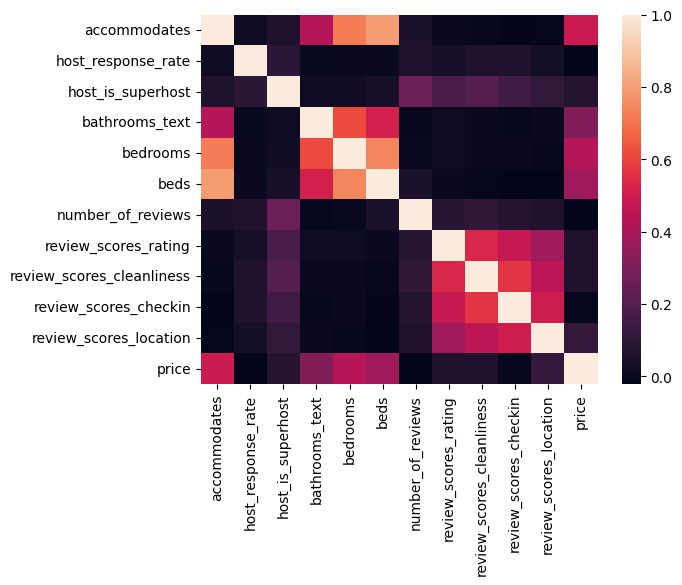

In [ ]:
#heatmap
relevant_featres = train_df[['accommodates','host_response_rate', 'host_is_superhost', 'bathrooms_text', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'price']]
sns.heatmap(relevant_featres.corr())

Price Histograms

Text(0.5, 0, 'Price')

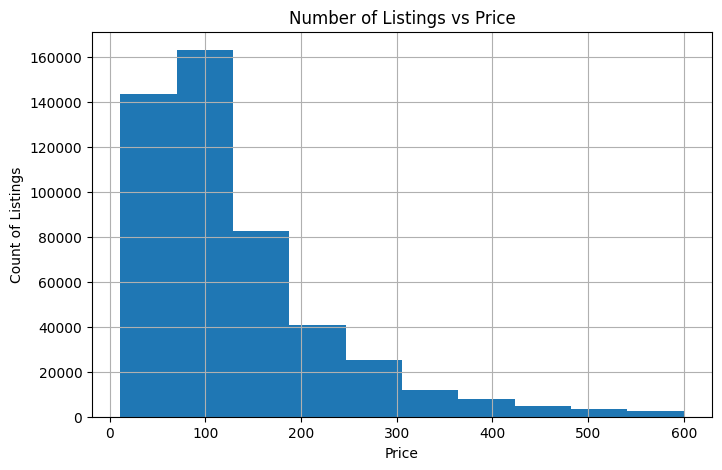

In [ ]:
train_df.hist('price',figsize=(8,5))
plt.title('Number of Listings vs Price')
plt.ylabel('Count of Listings')
plt.xlabel("Price")

Text(0.5, 0, 'ln(price)')

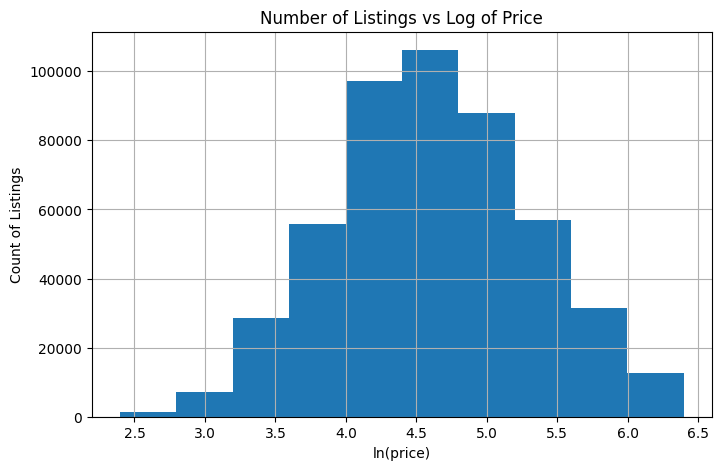

In [ ]:
train_df['log_price'] = np.log(train_df['price'])
train_df.hist('log_price',figsize=(8,5))
plt.title('Number of Listings vs Log of Price')
plt.ylabel("Count of Listings")
plt.xlabel('ln(price)')

In [ ]:
test_df['log_price'] = np.log(test_df['price'])

# Visualizations

In [ ]:
# further examine outliers
high_price_data = train_data.loc[train_data['price'] >= 1000]

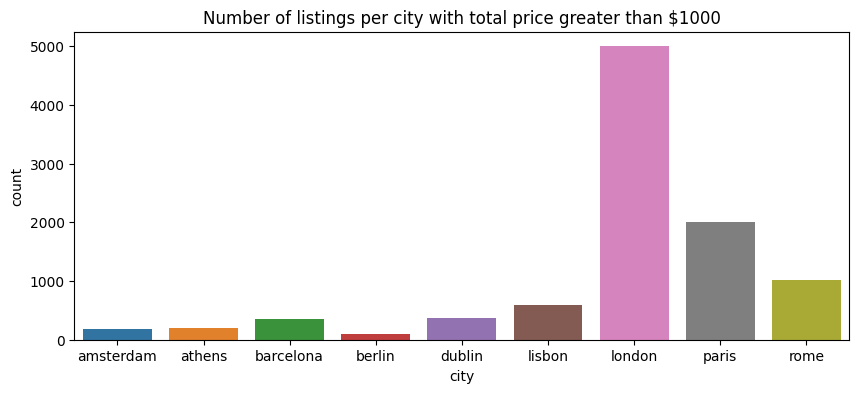

In [ ]:
# for high prices, what are the cities?
plt.figure(figsize=(10, 4))
sns.countplot(data=high_price_data, x='city')
plt.title("Number of listings per city with total price greater than $1000")
plt.show()

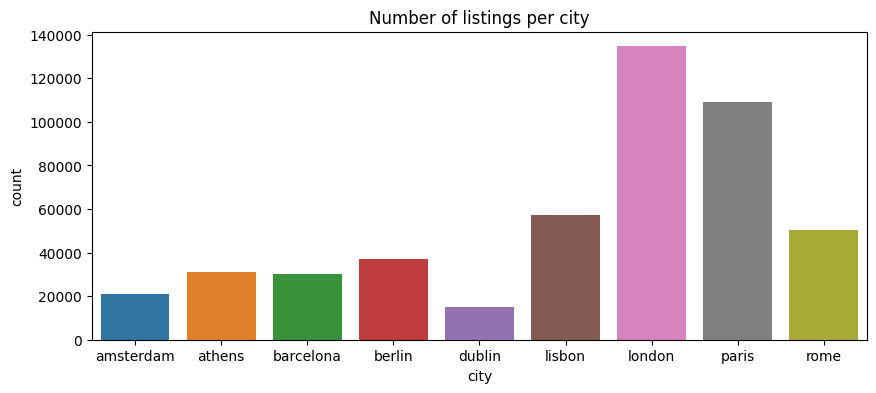

In [ ]:
# counts per city
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='city')
plt.title("Number of listings per city")
plt.show()

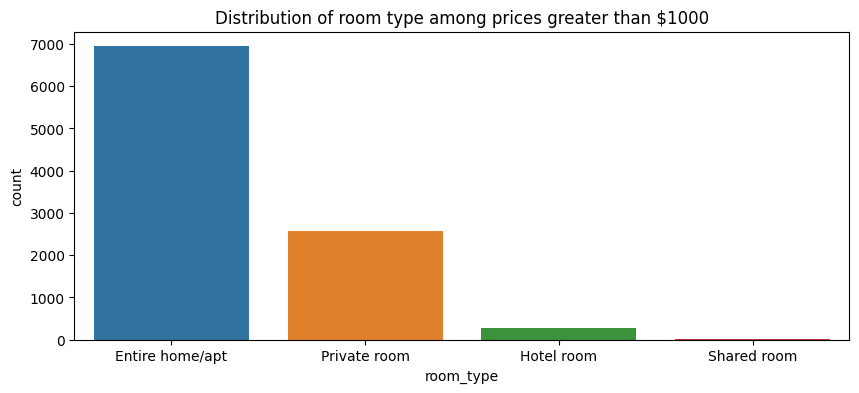

In [ ]:
# for high prices, what is most frequent room type?
plt.figure(figsize=(10, 4))
sns.countplot(data=high_price_data, x='room_type')
plt.title("Distribution of room type among prices greater than $1000")
plt.show()

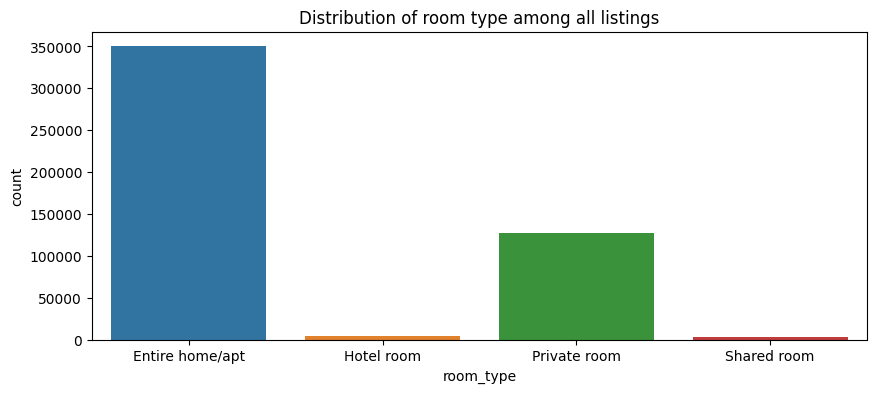

In [ ]:
# room type distribution, all data
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='room_type')
plt.title("Distribution of room type among all listings")
plt.show()

In [ ]:
train_df['property_type'].unique()

array(['Private room in condo', 'Entire condo',
       'Private room in rental unit', 'Entire rental unit', 'Entire loft',
       'Private room in home', 'Entire townhouse',
       'Shared room in rental unit', 'Entire home',
       'Private room in bed and breakfast', 'Entire home/apt',
       'Entire serviced apartment', 'Private room in guest suite',
       'Entire vacation home', 'Private room in townhouse',
       'Entire guesthouse', 'Entire guest suite', 'Boat', 'Entire place',
       'Room in bed and breakfast', 'Room in aparthotel',
       'Room in boutique hotel', 'Private room in cottage',
       'Private room in guesthouse', 'Room in hotel',
       'Private room in serviced apartment', 'Shared room in hostel',
       'Private room in hostel', 'Entire chalet', 'Room in hostel',
       'Private room in casa particular', 'Room in serviced apartment',
       'Shared room in loft', 'Private room in farm stay', 'Private room',
       'Entire villa', 'Entire bungalow', 'Private ro

In [ ]:
# property types
pd.set_option('display.max_rows', None)
train_df['property_type'].value_counts()

Entire rental unit                    253466
Private room in rental unit            64724
Entire condo                           47730
Private room in home                   21811
Entire home                            18975
Private room in condo                  12631
Entire serviced apartment               8457
Entire loft                             7262
Private room in bed and breakfast       6344
Room in boutique hotel                  5079
Room in hotel                           4339
Entire townhouse                        4195
Private room in townhouse               4146
Entire vacation home                    1827
Entire villa                            1403
Private room in serviced apartment      1401
Private room in guesthouse              1328
Private room in guest suite             1225
Private room in hostel                  1181
Shared room in rental unit              1172
Shared room in hostel                   1105
Entire guesthouse                       1083
Room in ap

# Scatterplots for Multivariate analysis

Text(0.5, 1.0, 'Prices by number of guests accomodated')

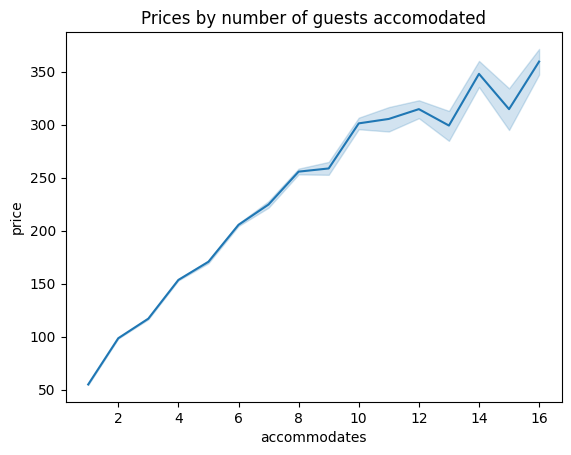

In [ ]:
# price stats by person capacity
sns.lineplot(data=train_df, x = 'accommodates', y = 'price')
plt.title("Prices by number of guests accomodated")

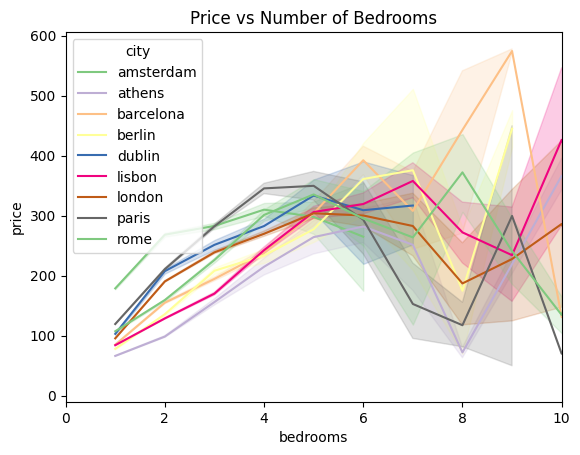

In [ ]:
sns.lineplot(data=train_df, x="bedrooms", y="price", hue="city", palette="Accent")
plt.xlim(0,10)
plt.title("Price vs Number of Bedrooms")
plt.show()

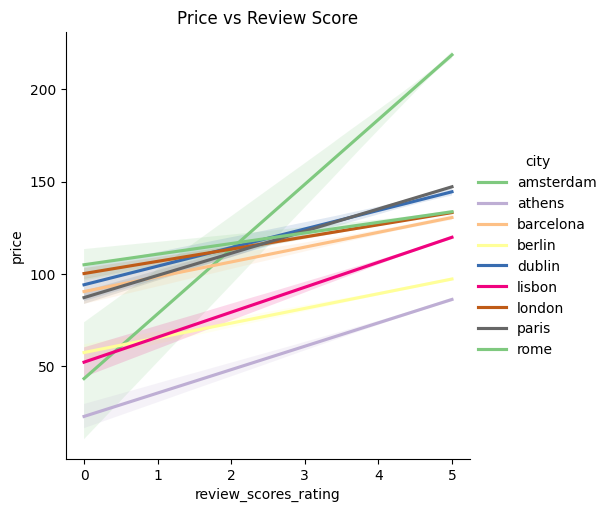

In [ ]:
sns.lmplot(data=train_df, x="review_scores_rating", y="price", hue="city", scatter=False, palette="Accent")
plt.title("Price vs Review Score")
plt.show()

<ipython-input-85-ddd26338879c>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train_df, x="review_scores_rating", y="price", palette="Accent")


<Axes: xlabel='review_scores_rating', ylabel='price'>

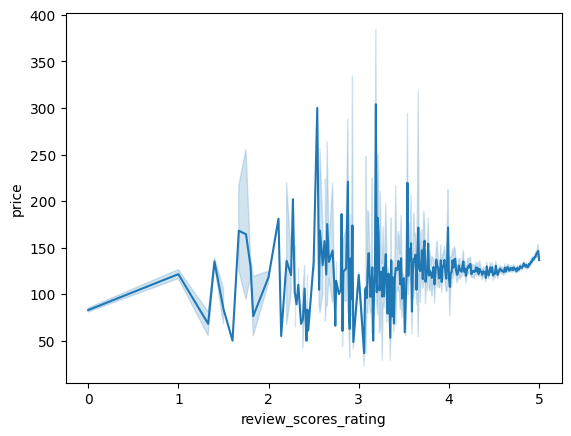

In [ ]:
sns.lineplot(data=train_df, x="review_scores_rating", y="price", palette="Accent")

In [ ]:
# more plots
# g = sns.PairGrid(train_df, vars=["price", "accommodates", "bathrooms_text", "bedrooms", "review_scores_cleanliness"])
# g.map(sns.lineplot)

# Convert Categorical Features

In [ ]:
# One hot encoding (https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python)
city_dummies = pd.get_dummies(train_df.city)
host_response_dummies = pd.get_dummies(train_df.host_response_time)
room_type_dummies = pd.get_dummies(train_df.room_type)

In [ ]:
train_df = pd.concat([train_df, city_dummies, host_response_dummies, room_type_dummies], axis=1)

In [ ]:
# encode test df
city_dummies_test = pd.get_dummies(test_df.city)
host_response_dummies_test = pd.get_dummies(test_df.host_response_time)
room_type_dummies_test = pd.get_dummies(test_df.room_type)
test_df = pd.concat([test_df, city_dummies_test, host_response_dummies_test, room_type_dummies_test], axis=1)

view results of one hot encoding

In [ ]:
# city_dummies
# host_response_dummies
print(room_type_dummies.head())

       Entire home/apt  Hotel room  Private room  Shared room
15671                0           0             1            0
11149                1           0             0            0
10017                1           0             0            0
669                  0           0             1            0
44470                1           0             0            0


In [ ]:
train_df.columns

Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city', 'price',
       'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
       'london', 'paris', 'rome', 'a few days or more', 'within a day',
       'within a few hours', 'within an hour', 'Entire home/apt', 'Hotel room',
     

In [ ]:
train_df.shape

(485100, 53)

In [ ]:
no_dupes = train_df.drop_duplicates()

In [ ]:
no_dupes.shape

(485100, 53)

In [ ]:
train_df.loc[[18,25,30,50,105, 206],['room_type','Entire home/apt', 'Hotel room',
       'Private room', 'Shared room']]

room_type  Entire home/apt  Hotel room  Private room  Shared room
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18      Private room                0           0             1            0
18      Private room                0           0             1            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18      Private room                0           0             1            0
18      Private room                0           0             1            0
18      Private room                0           0             1            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18   Entire home/apt                1           0             0            0
18      Private room                0           0             1            0
25   Entire home/apt                1           0             0            0
25      Private room                0           0             1            0
25      Private room                0           0             1            0
25   Entire home/apt                1           0             0            0
25      Private room                0           0             1            0
25      Private room                0           0             1            0
25      Private room                0           0             1            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
25        Hotel room                0           1             0            0
25   Entire home/apt                1           0             0            0
25      Private room                0           0             1            0
25   Entire home/apt                1           0             0            0
25   Entire home/apt                1           0             0            0
30   Entire home/apt                1           0             0            0
30   Entire home/apt                1           0             0            0
30   Entire home/apt                1           0             0            0
30   Entire home/apt                1           0             0            0
30   Entire home/apt                1           0             0            0
30      Private room                0           0             1            0
30   Entire home/apt                1           0             0            0
30   Entire home/apt                1           0             0            0
30   Entire home/apt                1           0             0            0
30     

In [ ]:
# check size after processing
print(train_df.shape)
print(test_df.shape)

(485050, 53)
(123884, 53)


# Standardizing Features

In [6]:
from sklearn import preprocessing
# https://stackoverflow.com/questions/77224912/differences-in-linear-regression-model-performance-with-standardscaler-vs-min-m


train_cols_scale = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                          'host_has_profile_pic', 'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
                          'london', 'paris', 'rome', 'a few days or more',
                          'within a day', 'within a few hours', 'within an hour',
                          'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Entire condo', 'Entire home', 'Entire rental unit', 'Private room in home', 'Private room in rental unit', 'other_prop', 'attr_score',
                          'amenity_ Hair dryer', 'amenity_ Iron', 'amenity_ Dishes and silverware', 'amenity_ Cooking basics', 'amenity_ Refrigerator',
                          'amenity_ Smoke alarm', 'amenity_ Bed linens', 'amenity_ Microwave', 'amenity_ Carbon monoxide alarm', 'amenity_ Dedicated workspace', 'winter', 'spring', 'summer', 'fall','Private room in condo', 'Entire serviced apartment', 'Entire loft', 'Private room in bed and breakfast', 'Room in boutique hotel', 'Room in hotel']
train_data_numerical = train_df_new[train_cols_scale]
test_data_numerical = test_df_new[train_cols_scale]
train_ids = train_df_new['id']
test_ids = test_df_new['id']

scaler = preprocessing.StandardScaler()
train_scaled = scaler.fit_transform(train_data_numerical)
scaled_train_data = pd.DataFrame(train_scaled, columns=train_data_numerical.columns)
scaled_train_data = pd.concat([train_ids.to_frame(name='id'), scaled_train_data], axis=1)

test_scaled = scaler.transform(test_data_numerical)
scaled_test_data = pd.DataFrame(test_scaled, columns=test_data_numerical.columns)
scaled_test_data = pd.concat([test_ids.to_frame(name='id'), scaled_test_data], axis=1)

scaled_train_data['log_price'] = train_df_new['log_price']
scaled_test_data['log_price'] = test_df_new['log_price']

In [8]:
scaled_train_data.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/scaled_train_new.csv', index=False)
scaled_test_data.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/scaled_test_new.csv', index=False)

In [36]:
scaled_train_data.head()

id  host_response_rate  host_acceptance_rate  \
0            18582490            0.277366              0.448307   
1            52976053            0.277366              0.498538   
2  736184621212894214            0.277366              0.498538   
3             1575295           -0.384861              0.498538   
4  635310471759670270            0.277366             -1.008373   

   host_is_superhost  host_has_profile_pic  host_identity_verified  \
0          -0.511814              0.107844                0.348653   
1          -0.511814              0.107844               -2.868182   
2           1.953835              0.107844                0.348653   
3          -0.511814              0.107844                0.348653   
4          -0.511814              0.107844                0.348653   

   accommodates  bathrooms  bedrooms      beds  ...    spring    summer  \
0     -0.674707   0.412792 -0.512442 -0.666371  ... -0.653789  1.455056   
1     -0.674707   1.222600 -0.512442 -0.666371  ... -0.653789  1.455056   
2     -0.674707  -0.397016 -0.512442 -0.666371  ...  1.529544 -0.687259   
3     -0.674707  -0.397016 -0.512442 -0.666371  ... -0.653789 -0.687259   
4     -0.674707  -0.397016 -0.512442 -0.666371  ...  1.529544 -0.687259   

       fall  Private room in condo  Entire serviced apartment  Entire loft  \
0 -0.296175               6.116004                  -0.133202    -0.123279   
1 -0.296175              -0.163505                  -0.133202    -0.123279   
2 -0.296175              -0.163505                  -0.133202    -0.123279   
3  3.376387              -0.163505                  -0.133202    -0.123279   
4 -0.296175              -0.163505                  -0.133202    -0.123279   

   Private room in bed and breakfast  Room in boutique hotel  Room in hotel  \
0                          -0.115113               -0.102863      -0.095001   
1                          -0.115113               -0.102863      -0.095001   
2                          -0.115113               -0.102863      -0.095001   
3                          -0.115113               -0.102863      -0.095001   
4                          -0.115113               -0.102863      -0.095001   

   log_price  
0   4.605170  
1   5.273000  
2   3.828641  
3   4.143135  
4   5.438079  

[5 rows x 68 columns]

In [37]:
scaled_train_data.describe().transpose()

count          mean           std  \
id                                 485100.0  1.667961e+17  3.011936e+17   
host_response_rate                 485100.0  4.421741e-16  1.000001e+00   
host_acceptance_rate               485100.0  1.803088e-16  1.000001e+00   
host_is_superhost                  485100.0 -5.648749e-17  1.000001e+00   
host_has_profile_pic               485100.0 -4.245753e-16  1.000001e+00   
...                                     ...           ...           ...   
Entire loft                        485100.0 -3.032001e-17  1.000001e+00   
Private room in bed and breakfast  485100.0  1.342429e-17  1.000001e+00   
Room in boutique hotel             485100.0  1.177647e-17  1.000001e+00   
Room in hotel                      485100.0 -2.256424e-17  1.000001e+00   
log_price                          485100.0  4.616749e+00  7.042761e-01   

                                           min           25%           50%  \
id                                 2737.000000  1.752429e+07  3.413128e+07   
host_response_rate                   -8.000468  2.773661e-01  2.773661e-01   
host_acceptance_rate                 -4.524498  9.669472e-02  4.483072e-01   
host_is_superhost                    -0.511814 -5.118140e-01 -5.118140e-01   
host_has_profile_pic                 -9.272661  1.078439e-01  1.078439e-01   
...                                        ...           ...           ...   
Entire loft                          -0.123279 -1.232786e-01 -1.232786e-01   
Private room in bed and breakfast    -0.115113 -1.151130e-01 -1.151130e-01   
Room in boutique hotel               -0.102863 -1.028630e-01 -1.028630e-01   
Room in hotel                        -0.095001 -9.500144e-02 -9.500144e-02   
log_price                             2.397895  4.127134e+00  4.605170e+00   

                                            75%           max  
id                                 5.373338e+07  9.642979e+17  
host_response_rate                 2.773661e-01  2.773661e-01  
host_acceptance_rate               4.985375e-01  4.985375e-01  
host_is_superhost                 -5.118140e-01  1.953835e+00  
host_has_profile_pic               1.078439e-01  1.078439e-01  
...                                         ...           ...  
Entire loft                       -1.232786e-01  8.111706e+00  
Private room in bed and breakfast -1.151130e-01  8.687114e+00  
Room in boutique hotel            -1.028630e-01  9.721673e+00  
Room in hotel                     -9.500144e-02  1.052616e+01  
log_price                          5.093750e+00  6.396930e+00  

[68 rows x 8 columns]

# Linear Regression
(source: https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/)

In [28]:
def linearReg(train_cols, train_df, test_df, target):

  # print(train_df.columns)
  # print(test_df.columns)
  x_train_lin_reg = train_df[train_cols]
  y_train_lin_reg = train_df[target]
  x_test = test_df[train_cols]
  y_test = test_df[target]

  # shape check
  # print(x_train_lin_reg.shape)
  # print(y_train_lin_reg.shape)
  # print(x_test.shape)
  # print(y_test.shape)
  # print(x_test.columns)
  # print(y_test.columns)

  # fit model
  lin_reg = LinearRegression()
  start = time.time()
  lin_reg.fit(x_train_lin_reg, y_train_lin_reg)
  stop = time.time()
  print("Elapsed time: ", (stop - start))

  # make predictions on test
  y_pred = lin_reg.predict(x_test)
  # predictions on train
  y_pred_train = lin_reg.predict(x_train_lin_reg)

  # compute r-squared
  # on train data
  r2_train = r2_score(y_train_lin_reg, y_pred_train)

  # on test data
  r2_test = r2_score(y_test, y_pred)

  print("Train R-sq: ", r2_train)
  print("Test R-sq: ", r2_test)

  # compute errors
  y_test = y_test.values.squeeze()
  mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
  mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
  rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

  print("MAE:",mae)
  print("MSE:",mse)
  print("RMSE:",rmse)

  # dollar errors
  y_pred_dollar = np.exp(y_pred)
  y_test_dollar = np.exp(y_test)
  resid_dollar = y_test_dollar - y_pred_dollar
  mae_dol = mean_absolute_error(y_true=y_test_dollar,y_pred=y_pred_dollar)

  print("MAE ($):", mae_dol)

  # coefficients
  lin_reg_coef = pd.DataFrame(list(zip(train_cols,(lin_reg.coef_))),columns=['Feature','Coefficient'])
  print(" ------------------------------------------ ")

  # absolute value importances
  lin_reg_coef['abs_Coefficient'] = abs(lin_reg_coef['Coefficient'])
  coeff_sum = lin_reg_coef['abs_Coefficient'].sum()
  lin_reg_coef['Weight_Percentage'] = lin_reg_coef['abs_Coefficient'] / coeff_sum * 100
  lin_reg_coef = lin_reg_coef.drop(columns=['abs_Coefficient'])
  print(tabulate(lin_reg_coef.sort_values(by='Weight_Percentage',ascending=False), headers='keys',tablefmt='psql'))

  # make residual plot
  residuals = y_test - y_pred
  fig = plt.figure(figsize=(10,3))

  sns.regplot(x=y_pred, y=residuals)
  plt.title("Residuals for the model in ln($)")
  plt.xlabel("y pred")
  plt.ylabel("residual")

  # residual plot in dollars ($)
  fig = plt.figure(figsize=(10,3))

  sns.regplot(x=y_pred_dollar, y=resid_dollar)
  plt.title("Residuals for the model ($)")
  plt.xlabel("y pred")
  plt.xlim(0, 1000)
  plt.ylim(-700, 700)
  plt.ylabel("residual")

  # save results to dict
  model_dict = {}
  model_dict['mae'],model_dict['mse'],model_dict['rmse'], model_dict['train_r2'], model_dict['test_r2'], model_dict['mae_dol'] = mae, mse, rmse, r2_train, r2_test, mae_dol
  model_metrics['lin_reg_all_std'] = model_dict

  # save model
  # joblib.dump(lin_reg,'/content/drive/My Drive/Airbnb_Price_Data/lin_reg_norm_all.joblib')

  return residuals




## Baseline: all numerical columns

In [ ]:
train_df_new.columns

Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city', 'price',
       'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
       'london', 'paris', 'rome', 'a few days or more', 'within a day',
       'within a few hours', 'within an hour', 'Entire home/apt', 'Hotel room',
       'Pr

In [10]:
train_cols_numer = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                          'host_has_profile_pic', 'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
                          'london', 'paris', 'rome']


Elapsed time:  1.6992418766021729
Train R-sq:  0.4062775195059197
Test R-sq:  0.40849514809329
MAE: 52.31834656214703
MSE: 5672.9090696333005
RMSE: 75.31871659576589
 ------------------------------------------ 
+----+--------------------------------+---------------+---------------------+
|    | Feature                        |   Coefficient |   Weight_Percentage |
|----+--------------------------------+---------------+---------------------|
| 22 | amsterdam                      |     92.2733   |          17.076     |
| 23 | athens                         |    -62.4861   |          11.5636    |
| 17 | review_scores_location         |     39.6471   |           7.33703   |
| 27 | lisbon                         |    -38.7003   |           7.16183   |
| 18 | review_scores_value            |    -33.8248   |           6.25957   |
| 14 | review_scores_cleanliness      |     28.2636   |           5.23042   |
|  5 | accommodates                   |     24.0794   |           4.4561    |
| 26 | du

array([ -22.00707413,   12.14709475, -141.09920648, ...,  -53.04704416,
         61.16300433,    1.53423046])

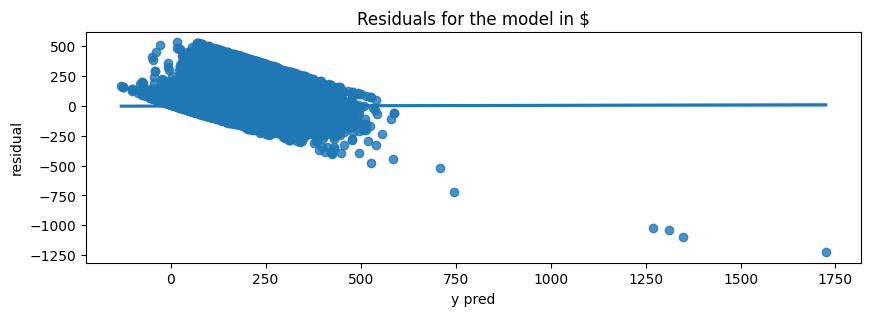

In [23]:
linearReg(train_cols_numer, train_df_new, test_df_new, 'price')

Elapsed time:  2.0104827880859375
Train R-sq:  0.44707252541422504
Test R-sq:  0.4474346628088888
MAE: 0.4103488956718618
MSE: 0.2730100800466158
RMSE: 0.5225036651035242
MAE ($): 52.34784467168396
 ------------------------------------------ 
+----+--------------------------------+---------------+---------------------+
|    | Feature                        |   Coefficient |   Weight_Percentage |
|----+--------------------------------+---------------+---------------------|
| 22 | amsterdam                      |   0.693391    |          16.015     |
| 23 | athens                         |  -0.538699    |          12.4422    |
| 17 | review_scores_location         |   0.32796     |           7.5748    |
| 18 | review_scores_value            |  -0.310173    |           7.16397   |
| 14 | review_scores_cleanliness      |   0.243133    |           5.61557   |
| 27 | lisbon                         |  -0.235143    |           5.43103   |
| 29 | paris                          |   0.209473    |

array([-0.01600931,  0.36021531, -0.86686159, ..., -0.75658896,
        0.64377285,  0.27224319])

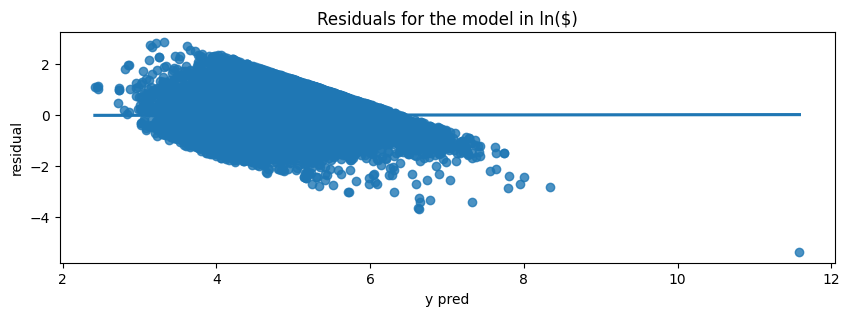

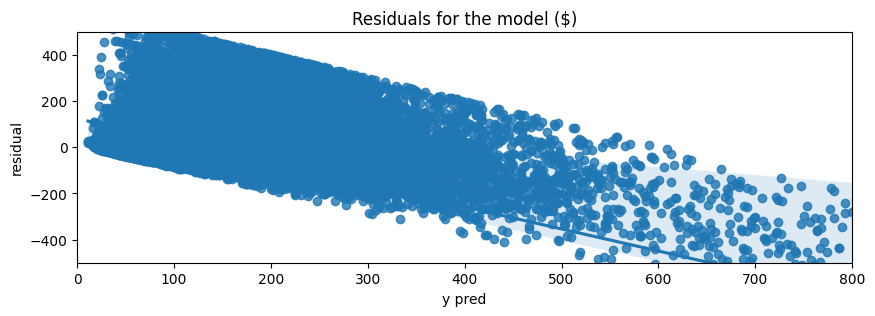

In [31]:
linearReg(train_cols_numer, train_df_new, test_df_new, 'log_price')

## All features

Elapsed time:  4.39099645614624
Train R-sq:  0.5926688116972049
Test R-sq:  0.5906828237291375
MAE: 0.347660202905871
MSE: 0.20223439209237556
RMSE: 0.4497047832660617
MAE ($): 48.07520193898185
 ------------------------------------------ 
+----+-----------------------------------+---------------+---------------------+
|    | Feature                           |   Coefficient |   Weight_Percentage |
|----+-----------------------------------+---------------+---------------------|
| 23 | athens                            |  -0.845325    |          9.87344    |
| 64 | Room in boutique hotel            |   0.584353    |          6.82528    |
| 38 | Shared room                       |  -0.572101    |          6.68217    |
| 22 | amsterdam                         |   0.536482    |          6.26614    |
| 65 | Room in hotel                     |   0.518441    |          6.05542    |
| 42 | Private room in home              |  -0.39644     |          4.63045    |
| 26 | dublin                  

array([ 0.06685631,  0.47290896, -0.66300206, ..., -0.41640476,
        0.34804078,  0.18987882])

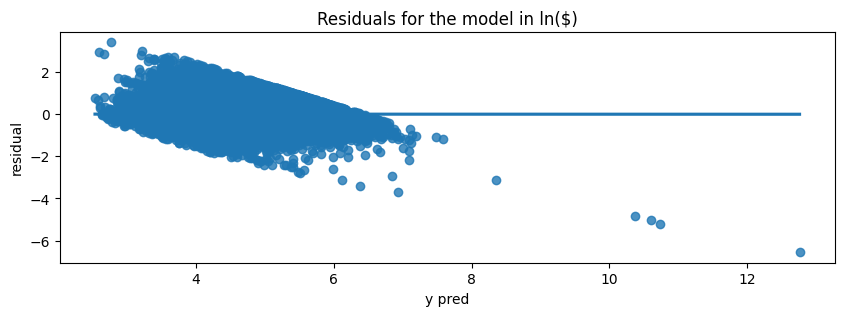

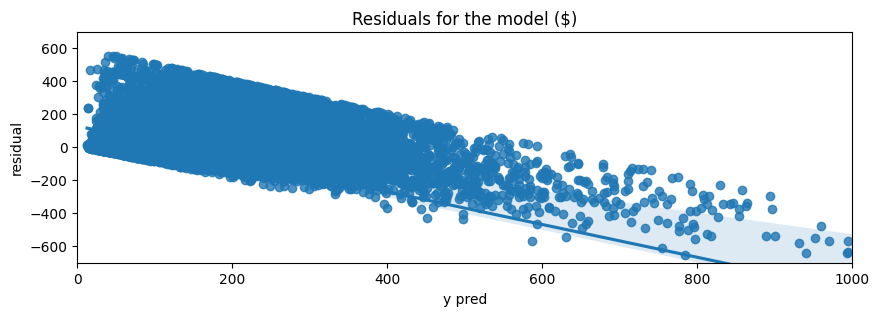

In [38]:
linearReg(train_cols, train_df_new, test_df_new, 'log_price')

In [ ]:
# check on the beds ratio thing, that did nothing
# train_cols_ratio = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
#                           'host_has_profile_pic', 'host_identity_verified','bathrooms', 'bedrooms', 'number_of_reviews',
#                           'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
#                           'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
#                           'london', 'paris', 'rome', 'beds_perPerson']
# linearReg(train_cols_numer, train_df_new, test_df_new, 'log_price')

Linear Regression With log(price)

## Linear Regression for a Single City (Amsterdam)

In [ ]:
train_ams = train_df.loc[train_df['city'] == 'amsterdam']
test_ams = test_df.loc[test_df['city'] == 'amsterdam']


(21135, 54)
(21135, 41)
(21135,)
(5178, 41)
(5178,)
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'amsterdam',
       'athens', 'barcelona', 'berlin', 'dublin', 'lisbon', 'london', 'paris',
       'rome', 'a few days or more', 'within a day', 'within a few hours',
       'within an hour', 'Entire home/apt', 'Hotel room', 'Private room',
       'Shared room'],
      dtype='object')
Train R-sq:  0.3950525814599738
Test R-sq:  0.4107982777265825
MAE: 0.30

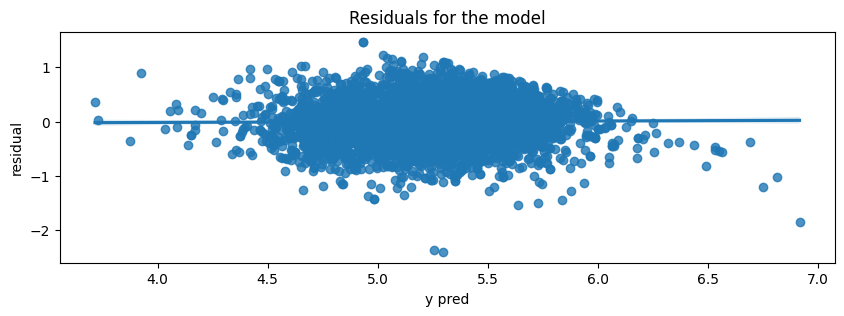

In [ ]:
print(train_ams.shape)
train_ams.head(10)
linearReg(train_cols, train_ams, test_ams, 'log_price')

## Baseline Numerical Regression(with standardized features)

In [34]:
scaled_train_data.head()

id  host_response_rate  host_acceptance_rate  \
0            18582490            0.277366              0.448307   
1            52976053            0.277366              0.498538   
2  736184621212894214            0.277366              0.498538   
3             1575295           -0.384861              0.498538   
4  635310471759670270            0.277366             -1.008373   

   host_is_superhost  host_has_profile_pic  host_identity_verified  \
0          -0.511814              0.107844                0.348653   
1          -0.511814              0.107844               -2.868182   
2           1.953835              0.107844                0.348653   
3          -0.511814              0.107844                0.348653   
4          -0.511814              0.107844                0.348653   

   accommodates  bathrooms  bedrooms      beds  ...    spring    summer  \
0     -0.674707   0.412792 -0.512442 -0.666371  ... -0.653789  1.455056   
1     -0.674707   1.222600 -0.512442 -0.666371  ... -0.653789  1.455056   
2     -0.674707  -0.397016 -0.512442 -0.666371  ...  1.529544 -0.687259   
3     -0.674707  -0.397016 -0.512442 -0.666371  ... -0.653789 -0.687259   
4     -0.674707  -0.397016 -0.512442 -0.666371  ...  1.529544 -0.687259   

       fall  Private room in condo  Entire serviced apartment  Entire loft  \
0 -0.296175               6.116004                  -0.133202    -0.123279   
1 -0.296175              -0.163505                  -0.133202    -0.123279   
2 -0.296175              -0.163505                  -0.133202    -0.123279   
3  3.376387              -0.163505                  -0.133202    -0.123279   
4 -0.296175              -0.163505                  -0.133202    -0.123279   

   Private room in bed and breakfast  Room in boutique hotel  Room in hotel  \
0                          -0.115113               -0.102863      -0.095001   
1                          -0.115113               -0.102863      -0.095001   
2                          -0.115113               -0.102863      -0.095001   
3                          -0.115113               -0.102863      -0.095001   
4                          -0.115113               -0.102863      -0.095001   

   log_price  
0   4.605170  
1   5.273000  
2   3.828641  
3   4.143135  
4   5.438079  

[5 rows x 68 columns]

Elapsed time:  1.2776167392730713
Train R-sq:  0.4470715385430588
Test R-sq:  0.44743270787683276
MAE: 0.41034725209041095
MSE: 0.2730110459344867
RMSE: 0.5225045893908365
MAE ($): 52.348941700722605
 ------------------------------------------ 
+----+--------------------------------+---------------+---------------------+
|    | Feature                        |   Coefficient |   Weight_Percentage |
|----+--------------------------------+---------------+---------------------|
| 28 | london                         |  -5.12044e+11 |        17.0843      |
| 29 | paris                          |  -4.77738e+11 |        15.9397      |
| 27 | lisbon                         |  -3.6823e+11  |        12.2859      |
| 30 | rome                           |  -3.49541e+11 |        11.6624      |
| 25 | berlin                         |  -3.03692e+11 |        10.1326      |
| 23 | athens                         |  -2.80278e+11 |         9.35146     |
| 24 | barcelona                      |  -2.75192e+11

array([-0.01621245,  0.35967496, -0.86679293, ..., -0.75635573,
        0.64408255,  0.27273365])

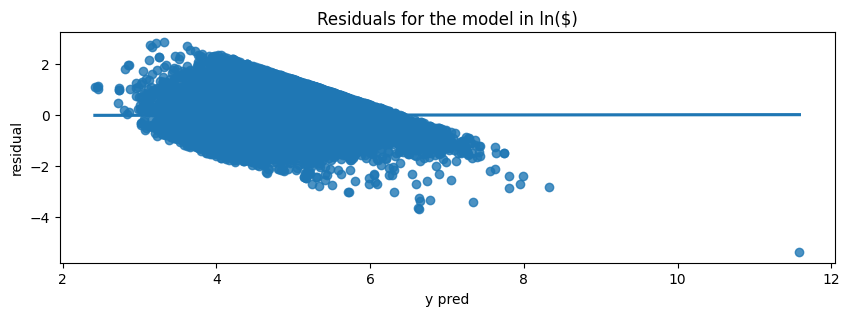

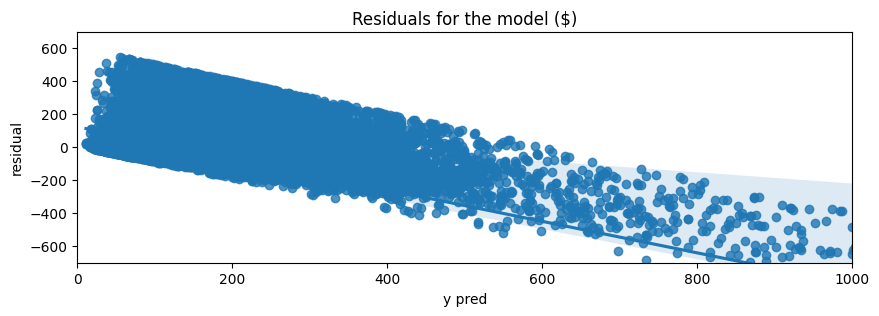

In [30]:
linearReg(train_cols_numer, scaled_train_data, scaled_test_data, 'log_price')

Elapsed time:  4.036398649215698
Train R-sq:  0.592656790646656
Test R-sq:  0.5907035656426414
MAE: 0.34769475246860426
MSE: 0.2022241439803699
RMSE: 0.44969338885552884
MAE ($): 47.84228627016096
 ------------------------------------------ 
+----+-----------------------------------+---------------+---------------------+
|    | Feature                           |   Coefficient |   Weight_Percentage |
|----+-----------------------------------+---------------+---------------------|
| 35 | Entire home/apt                   |  -1.12198e+12 |        14.0278      |
| 37 | Private room                      |  -1.10015e+12 |        13.7549      |
| 41 | Entire rental unit                |  -7.8628e+11  |         9.83069     |
| 43 | Private room in rental unit       |  -5.35264e+11 |         6.69229     |
| 39 | Entire condo                      |  -4.68853e+11 |         5.86196     |
| 44 | other_prop                        |  -4.03413e+11 |         5.04379     |
| 42 | Private room in home  

array([ 0.06459281,  0.47209644, -0.6613081 , ..., -0.4197216 ,
        0.34770582,  0.19063609])

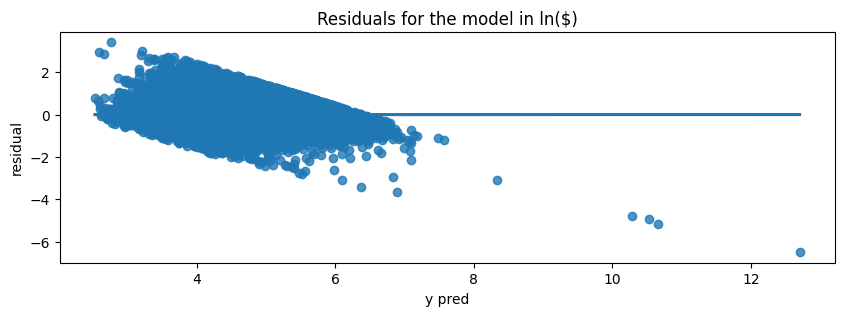

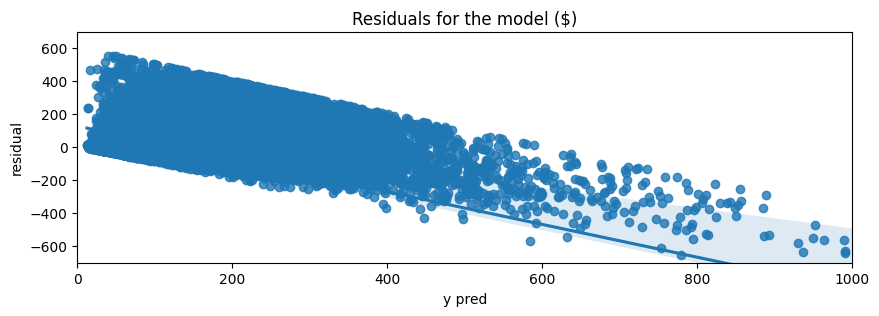

In [31]:
linearReg(train_cols, scaled_train_data, scaled_test_data, 'log_price')

(485050, 60)
(485050,)
(121562, 60)
(121562,)
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'amsterdam',
       'athens', 'barcelona', 'berlin', 'dublin', 'lisbon', 'london', 'paris',
       'rome', 'a few days or more', 'within a day', 'within a few hours',
       'within an hour', 'Entire home/apt', 'Hotel room', 'Private room',
       'Shared room', 'Entire condo', 'Entire home', 'Entire rental unit',
       'Private room in home', 'Private room in rental unit', 'other_prop

AttributeError: ignored

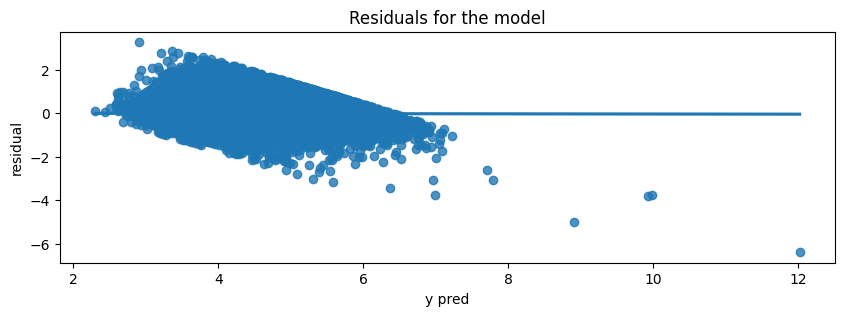

In [ ]:
residuals = linearReg(train_cols, scaled_train, scaled_test, 'log_price')

## Residual Analysis

In [ ]:
over_preds = residuals < -2.75
under_preds = residuals > 2.6
over_indices = np.nonzero(over_preds)[0]
under_indices = np.nonzero(under_preds)[0]
over_pred_listings = all_test_data.iloc[over_indices]
under_pred_listings = all_test_data.iloc[under_indices]
over_pred_listings.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/overpreds_df.csv', index=False)
under_pred_listings.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/underpreds_df.csv', index=False)

(485050, 61)
(485050,)
(121562, 61)
(121562,)
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'amsterdam',
       'athens', 'barcelona', 'berlin', 'dublin', 'lisbon', 'london', 'paris',
       'rome', 'a few days or more', 'within a day', 'within a few hours',
       'within an hour', 'Entire home/apt', 'Hotel room', 'Private room',
       'Shared room', 'Entire condo', 'Entire home', 'Entire rental unit',
       'Private room in home', 'Private room in rental unit', 'other_prop

array([ 0.17067616, -0.37214217, -0.23369602, ...,  0.46317482,
        0.17886969, -0.22139463])

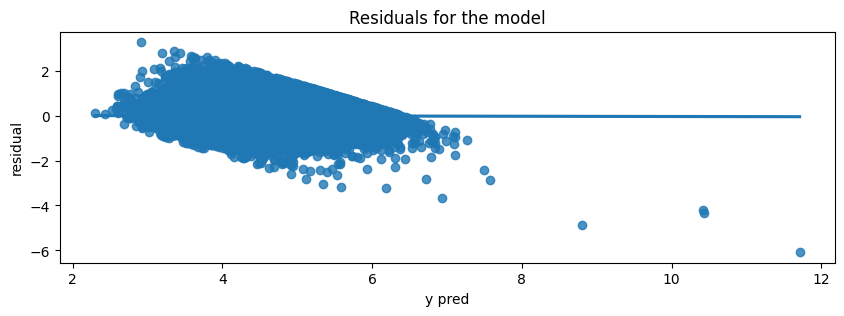

In [ ]:
# with extra beds feature now
linearReg(train_cols, scaled_train_data, scaled_test_data, 'log_price')

# Adding in Location Features

In [ ]:
# save data up until this point
train_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/train_cleaned.csv', index=False)
test_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/test_cleaned.csv', index=False)

In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/train_cleaned.csv')
test_df = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/test_cleaned.csv')

In [ ]:
train_df.shape

(485100, 53)

## Read in Attraction Data

In [ ]:
# read in attraction data
ams_csv = '/content/drive//My Drive/Airbnb_Attr/ams_attr.csv'
ams_attr_data = pd.read_csv(ams_csv)
ams_attr_data['city'] = 'amsterdam'
ath_csv = '/content/drive//My Drive/Airbnb_Attr/ath_attr.csv'
ath_attr_data = pd.read_csv(ath_csv)
ath_attr_data['city'] = 'athens'
bar_csv = '/content/drive//My Drive/Airbnb_Attr/bar_attr.csv'
bar_attr_data = pd.read_csv(bar_csv)
bar_attr_data['city'] = 'barcelona'
ber_csv = '/content/drive//My Drive/Airbnb_Attr/ber_attr.csv'
ber_attr_data = pd.read_csv(ber_csv)
ber_attr_data['city'] = 'berlin'
dub_csv = '/content/drive//My Drive/Airbnb_Attr/dub_attr.csv'
dub_attr_data = pd.read_csv(dub_csv)
dub_attr_data['city'] = 'dublin'
lis_csv = '/content/drive//My Drive/Airbnb_Attr/lis_attr.csv'
lis_attr_data = pd.read_csv(lis_csv)
lis_attr_data['city'] = 'lisbon'
lon_csv = '/content/drive//My Drive/Airbnb_Attr/lon_attr.csv'
lon_attr_data = pd.read_csv(lon_csv)
lon_attr_data['city'] = 'london'
par_csv = '/content/drive//My Drive/Airbnb_Attr/par_attr.csv'
par_attr_data = pd.read_csv(par_csv)
par_attr_data['city'] = 'paris'
rom_csv = '/content/drive//My Drive/Airbnb_Attr/rom_attr.csv'
rom_attr_data = pd.read_csv(rom_csv)
rom_attr_data['city'] = 'rome'

all_attr_data = pd.concat([ams_attr_data, ath_attr_data, bar_attr_data, ber_attr_data, dub_attr_data, lis_attr_data, lon_attr_data, par_attr_data, rom_attr_data])


Save Attraction Data

In [ ]:
all_attr_data.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/All_Attr_Data.csv', index=False)

In [ ]:
all_attr_data = pd.read_csv('/content/drive/My Drive/Airbnb_Price_Data/All_Attr_Data.csv')

In [ ]:
# select 5 random rows to display
all_attr_data.iloc[[1, 7,12,22, 37]]

Unnamed: 0           Attraction  Longitude   Latitude       city  Rank
1          2.0      Van Gogh Museum   4.881410  52.357861  amsterdam   NaN
7          NaN            Parthenon  23.726759  37.972002     athens   3.0
12         NaN       Gothic Quarter   2.177053  41.381938  barcelona   3.0
22         NaN  Guinness Storehouse  -6.286539  53.342516     dublin   3.0
37         NaN        Louvre Museum   2.337687  48.861034      paris   3.0

In [ ]:
all_attr_data.shape

(45, 6)

## Calculate Attraction Score

Attraction score:
$$\frac{1}{\sum dist\_to\_top5\_attractions}$$

In [ ]:
import math
def computeAttrScore(row):
  sum = 0
  city_attr = all_attr_data.loc[all_attr_data['city'] == row.city]
  points = city_attr[['Latitude', 'Longitude']].apply(tuple, axis=1)
  for point in points:
    sum += math.dist(row['lat_long'], point)
    # print(sum)
  return 1/sum

In [ ]:
train_df.iloc[0:5,-18:]

amsterdam  athens  barcelona  berlin  dublin  lisbon  london  paris  rome  \
0          0       0          0       0       0       0       0      1     0   
1          0       0          1       0       0       0       0      0     0   
2          0       1          0       0       0       0       0      0     0   
3          0       0          0       1       0       0       0      0     0   
4          0       0          0       0       0       0       0      1     0   

   a few days or more  within a day  within a few hours  within an hour  \
0                   0             0                   0               1   
1                   0             0                   0               1   
2                   0             0                   0               1   
3                   0             0                   0               1   
4                   0             1                   0               0   

   Entire home/apt  Hotel room  Private room  Shared room  log_price  
0                0           0             1            0   4.605170  
1                1           0             0            0   5.273000  
2                1           0             0            0   3.828641  
3                0           0             1            0   4.143135  
4                1           0             0            0   5.438079

In [ ]:
# calculate attraction closeness rating
# source https://stackoverflow.com/questions/16031056/how-to-form-tuple-column-from-two-columns-in-pandas
# turn latitude and longitude into tuple
train_df['lat_long'] = train_df[['latitude', 'longitude']].apply(tuple,axis=1)
# sum up 1/ dist for top 5 attractions
train_df['attr_score'] = train_df.apply(computeAttrScore, axis=1)
# scale it by dividing by the max then multiply by 100 so that index ranges from 0-100
train_df['attr_scaled'] = 100 * train_df['attr_score'] / train_df['attr_score'].max()


# on test data
test_df['lat_long'] = test_df[['latitude', 'longitude']].apply(tuple,axis=1)
test_df['attr_score'] = test_df.apply(computeAttrScore, axis=1)
test_df['attr_scaled'] = 100 * test_df['attr_score'] / test_df['attr_score'].max()



array([[<Axes: title={'center': 'attr_scaled'}>]], dtype=object)

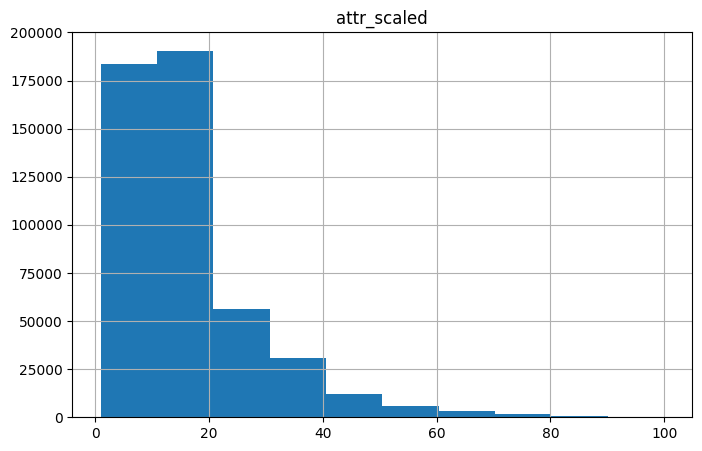

In [ ]:
train_df.hist('attr_scaled',figsize=(8,5))

In [ ]:
# checking answers
# math.dist(train_ams['lat_long'].iloc[0], (52.375080, 4.884070))+ math.dist(train_ams['lat_long'].iloc[0], (52.357861, 4.881410)) + math.dist(train_ams['lat_long'].iloc[0], (52.359997, 4.885219))+ math.dist(train_ams['lat_long'].iloc[0], (52.358518, 4.868348))+ math.dist(train_ams['lat_long'].iloc[0], (52.373910, 4.880139))
# type(train_ams['lat_long'][0])
# type((52.375080, 4.884070))
# train_ams['lat_long'].iloc[0]
# print(train_ams['attr_score'].iloc[0])
# print(train_ams['attr_scaled'].iloc[0])
# train_ams.head()

Linear Regression with Attraction Scores

In [ ]:
train_cols_attr = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                          'host_has_profile_pic', 'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
                          'london', 'paris', 'rome', 'a few days or more',
                          'within a day', 'within a few hours', 'within an hour',
                          'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'attr_scaled']


In [ ]:
linearReg(train_cols_attr, train_df, test_df, 'log_price')

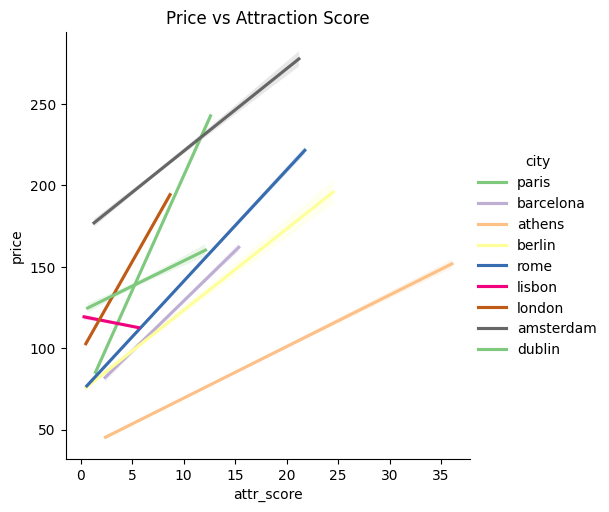

In [ ]:
sns.lmplot(data=train_df, x="attr_score", y="price", hue="city", scatter=False, palette="Accent")
plt.title("Price vs Attraction Score")
plt.show()

# Encode Property Type

In [ ]:
pd.set_option('display.max_rows', None)
train_df['property_type'].value_counts()

Entire rental unit                    253466
Private room in rental unit            64724
Entire condo                           47730
Private room in home                   21811
Entire home                            18975
Private room in condo                  12631
Entire serviced apartment               8457
Entire loft                             7262
Private room in bed and breakfast       6344
Room in boutique hotel                  5079
Room in hotel                           4339
Entire townhouse                        4195
Private room in townhouse               4146
Entire vacation home                    1827
Entire villa                            1403
Private room in serviced apartment      1401
Private room in guesthouse              1328
Private room in guest suite             1225
Private room in hostel                  1181
Shared room in rental unit              1172
Shared room in hostel                   1105
Entire guesthouse                       1083
Room in ap

In [ ]:
def encode_prop(value):
      if value not in ['Entire rental unit', 'Private room in rental unit','Entire condo','Private room in home','Entire home', 'Private room in condo', 'Entire serviced apartment', 'Entire loft', 'Private room in bed and breakfast', 'Room in boutique hotel', 'Room in hotel']:
          return 'other_prop'
      return value

train_df['property_type'] = train_df['property_type'].apply(encode_prop)
test_df['property_type'] = test_df['property_type'].apply(encode_prop)

In [ ]:
# one hot encoding of property type
prop_dummies_train = pd.get_dummies(train_df.property_type)
prop_dummies_test = pd.get_dummies(test_df.property_type)
prop_dummies_train.head()

Entire condo  Entire home  Entire loft  Entire rental unit  \
0             0            0            0                   0   
1             1            0            0                   0   
2             1            0            0                   0   
3             0            0            0                   0   
4             0            0            0                   1   

   Entire serviced apartment  Private room in bed and breakfast  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Private room in condo  Private room in home  Private room in rental unit  \
0                      1                     0                            0   
1                      0                     0                            0   
2                      0                     0                            0   
3                      0                     0                            1   
4                      0                     0                            0   

   Room in boutique hotel  Room in hotel  other_prop  
0                       0              0           0  
1                       0              0           0  
2                       0              0           0  
3                       0              0           0  
4                       0              0           0

In [ ]:
train_df = pd.concat([train_df, prop_dummies_train], axis=1)
test_df = pd.concat([test_df, prop_dummies_test], axis=1)

In [ ]:
train_df[['property_type','Entire rental unit', 'Private room in rental unit','Entire condo','Private room in home','Entire home', 'Private room in condo', 'Entire serviced apartment', 'Entire loft', 'Private room in bed and breakfast', 'Room in boutique hotel', 'Room in hotel' ]].head()

property_type  Entire rental unit  \
0        Private room in condo                   0   
1                 Entire condo                   0   
2                 Entire condo                   0   
3  Private room in rental unit                   0   
4           Entire rental unit                   1   

   Private room in rental unit  Entire condo  Private room in home  \
0                            0             0                     0   
1                            0             1                     0   
2                            0             1                     0   
3                            1             0                     0   
4                            0             0                     0   

   Entire home  Private room in condo  Entire serviced apartment  Entire loft  \
0            0                      1                          0            0   
1            0                      0                          0            0   
2            0                      0                          0            0   
3            0                      0                          0            0   
4            0                      0                          0            0   

   Private room in bed and breakfast  Room in boutique hotel  Room in hotel  
0                                  0                       0              0  
1                                  0                       0              0  
2                                  0                       0              0  
3                                  0                       0              0  
4                                  0                       0              0

In [ ]:
train_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/All_Train_Data.csv', index=False)

In [ ]:
test_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/All_Test_Data.csv', index=False)

In [ ]:
print(all_train_data.columns)

Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city', 'price',
       'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
       'london', 'paris', 'rome', 'a few days or more', 'within a day',
       'within a few hours', 'within an hour', 'Entire home/apt', 'Hotel room',
     

# Amenities
source reference: https://www.kaggle.com/code/kaushikjag/airbnb-seattle-new-host-pricing-tip-prediction/notebook

In [ ]:
train_df['amenities'][1]

'["Fire extinguisher", "Pets allowed", "Refrigerator", "Wine glasses", "Hangers", "Wifi", "Central heating", "Books and reading material", "Free washer \\u2013 In unit", "Central air conditioning", "Microwave", "Room-darkening shades", "Shower gel", "Freezer", "Iron", "Essentials", "Hot water kettle", "Kitchen", "55\\" HDTV", "Smeg oven", "Hair dryer", "Drying rack for clothing", "Elevator", "Cleaning products", "Dedicated workspace", "Dishwasher", "Shampoo", "Coffee maker: pour-over coffee", "Exercise equipment", "Dishes and silverware", "Conditioner", "Bed linens", "Hot water", "Clothing storage: walk-in closet and closet", "Body soap", "Cleaning available during stay", "Cooking basics", "Long term stays allowed"]'

In [ ]:
type(train_df['amenities'][0])

str

In [ ]:
# dictionary to store amenities
amenities_dict = {}
for unique_row in train_df['amenities'].unique():
    for amen in unique_row.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
        if amen in amenities_dict:
            amenities_dict[amen] = amenities_dict[amen] + 1
        else:
            amenities_dict[amen] = 0

In [ ]:
len(amenities_dict)

17139

In [ ]:
print(amenities_dict.keys())

dict_keys(['TV with standard cable', ' Essentials', ' Refrigerator', ' Room-darkening shades', ' Smoke alarm', ' Babysitter recommendations', ' Host greets you', ' Coffee maker', ' Microwave', ' Hair dryer', ' Kitchen', ' Pets allowed', ' Oven', ' Bed linens', ' Hangers', ' Heating', ' Bathtub', ' Shampoo', ' Iron', ' Wifi', ' Hot water', ' Carbon monoxide alarm', ' Stove', ' Elevator', 'Fire extinguisher', ' Wine glasses', ' Central heating', ' Books and reading material', ' Free washer \\u2013 In unit', ' Central air conditioning', ' Shower gel', ' Freezer', ' Hot water kettle', ' 55\\ HDTV', ' Smeg oven', ' Drying rack for clothing', ' Cleaning products', ' Dedicated workspace', ' Dishwasher', ' Coffee maker: pour-over coffee', ' Exercise equipment', ' Dishes and silverware', ' Conditioner', ' Clothing storage: walk-in closet and closet', ' Body soap', ' Cleaning available during stay', ' Cooking basics', ' Long term stays allowed', 'Hangers', ' City skyline view', ' Mosquito net', 

## Visualizations of Amenities

Word Cloud

In [ ]:
amenities_sorted = sorted(amenities_dict.items(), key=lambda kv: kv[1], reverse = True)
amenities_sorted = amenities_sorted[:25]

In [ ]:
top_amens_dict = dict((x, y) for x, y in amenities_sorted)
top_amens_dict

{' Kitchen': 406021,
 ' Wifi': 396806,
 ' Essentials': 381639,
 ' Hair dryer': 357289,
 ' Hangers': 341334,
 ' Iron': 337083,
 ' Hot water': 336405,
 ' Dishes and silverware': 325547,
 ' Heating': 310912,
 ' Cooking basics': 299369,
 ' Refrigerator': 296930,
 ' Shampoo': 270678,
 ' Smoke alarm': 270606,
 ' Bed linens': 270000,
 ' Long term stays allowed': 243203,
 ' Microwave': 231613,
 ' Washer': 230002,
 ' Oven': 188330,
 ' TV': 182016,
 ' First aid kit': 176737,
 ' Coffee maker': 175941,
 ' Carbon monoxide alarm': 175500,
 ' Fire extinguisher': 171069,
 ' Stove': 166378,
 ' Dedicated workspace': 162075}

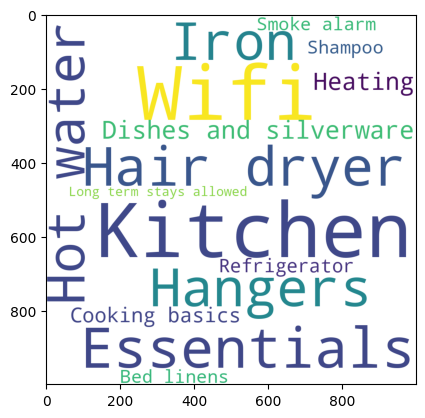

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=15,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_amens_dict)
plt.imshow(wc)

Pie Chart Plot

In [ ]:
labels = []
data = []
for tup in amenities_sorted[:10]:
  labels.append(tup[0])
  data.append(tup[1])

print(labels)
print(data)

[' Kitchen', ' Wifi', ' Essentials', ' Hair dryer', ' Hangers', ' Iron', ' Hot water', ' Dishes and silverware', ' Heating', ' Cooking basics']
[406071, 396758, 381781, 357315, 341514, 336766, 336584, 325726, 310969, 299498]


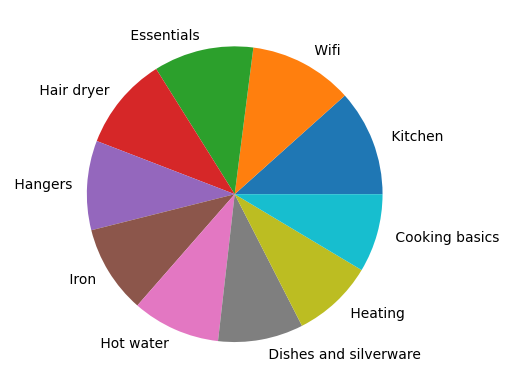

In [ ]:
import matplotlib.pyplot as plt

plt.pie(data, labels=labels)
plt.show()

Bar chart for top 12 amenities

In [ ]:
top_12 = amenities_sorted[:12]
amens = [i[0] for i in top_12]
counts = [i[1] for i in top_12]

Text(0.5, 1.0, 'Top 12 Amenities')

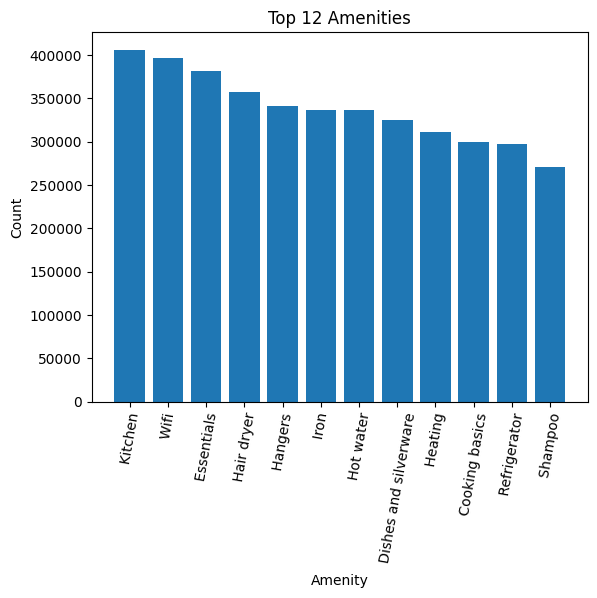

In [ ]:
plt.bar(amens, counts)
plt.xticks(rotation=80)
plt.xlabel("Amenity")
plt.ylabel("Count")
plt.title("Top 12 Amenities")

Adding columns for top 25 amenities

In [ ]:
def encode_amen(row, amenity):
  vals = row['amenities'].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
  if amenity in vals:
    return 1
  else:
    return 0

In [ ]:
# testing = all_train_data.iloc[:10,:-10]
# for amen in amenities_sorted[:10]:
#   testing['amenity_' + amen[0]] = testing.apply(lambda row: encode_amen(row, amen[0]),axis=1)

In [ ]:
# print(amenities_sorted[:25])
for amen in amenities_sorted[:25]:
  train_df['amenity_' + amen[0]] = train_df.apply(lambda row: encode_amen(row, amen[0]),axis=1)
  test_df['amenity_' + amen[0]] = test_df.apply(lambda row: encode_amen(row, amen[0]),axis=1)

In [ ]:
train_df.columns

Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city', 'price',
       'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
       'london', 'paris', 'rome', 'a few days or more', 'within a day',
       'within a few hours', 'within an hour', 'Entire home/apt', 'Hotel room',
     

In [ ]:
amenities_df = train_df.loc[:, 'amenity_ Kitchen' : 'amenity_ Dedicated workspace']
amenities_df.shape

(485100, 25)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
# https://www.rasgoml.com/feature-engineering-tutorials/feature-selection-using-the-f-test-in-scikit-learn
selector = SelectKBest(f_regression, k=10)
X_reduced = selector.fit_transform(amenities_df, train_df['log_price'])

cols = selector.get_support(indices=True)
selected_columns = amenities_df.iloc[:,cols].columns.tolist()
selected_columns

['amenity_ Hair dryer',
 'amenity_ Iron',
 'amenity_ Dishes and silverware',
 'amenity_ Cooking basics',
 'amenity_ Refrigerator',
 'amenity_ Smoke alarm',
 'amenity_ Bed linens',
 'amenity_ Microwave',
 'amenity_ Carbon monoxide alarm',
 'amenity_ Dedicated workspace']

In [ ]:
# drop the less related columns
train_df = train_df.drop(columns=['amenity_ Kitchen', 'amenity_ Wifi', 'amenity_ Essentials', 'amenity_ Hangers', 'amenity_ Hot water', 'amenity_ Heating',
                                              'amenity_ Shampoo', 'amenity_ Long term stays allowed', 'amenity_ Washer', 'amenity_ Oven', 'amenity_ TV', 'amenity_ First aid kit', 'amenity_ Coffee maker',
                                              'amenity_ Fire extinguisher', 'amenity_ Stove'])
test_df = test_df.drop(columns=['amenity_ Kitchen', 'amenity_ Wifi', 'amenity_ Essentials', 'amenity_ Hangers', 'amenity_ Hot water', 'amenity_ Heating',
                                              'amenity_ Shampoo', 'amenity_ Long term stays allowed', 'amenity_ Washer', 'amenity_ Oven', 'amenity_ TV', 'amenity_ First aid kit', 'amenity_ Coffee maker',
                                              'amenity_ Fire extinguisher', 'amenity_ Stove'])

In [ ]:
train_df.columns

Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city', 'price',
       'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
       'london', 'paris', 'rome', 'a few days or more', 'within a day',
       'within a few hours', 'within an hour', 'Entire home/apt', 'Hotel room',
     

In [ ]:
# save
train_df_new.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/All_Train_FinalEng.csv', index=False)
test_df_new.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/All_Test_FinalEng.csv', index=False)

## Linear Regression with Amenities added

In [52]:
train_cols_amens = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                          'host_has_profile_pic', 'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
                          'london', 'paris', 'rome', 'a few days or more',
                          'within a day', 'within a few hours', 'within an hour',
                          'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Entire condo', 'Entire home', 'Entire rental unit', 'Private room in home', 'Private room in rental unit', 'other_prop', 'attr_score',
                          'amenity_ Hair dryer','amenity_ Iron','amenity_ Dishes and silverware','amenity_ Cooking basics','amenity_ Refrigerator','amenity_ Smoke alarm','amenity_ Bed linens','amenity_ Microwave','amenity_ Carbon monoxide alarm','amenity_ Dedicated workspace']

In [53]:
len(train_cols_amens)

56

Elapsed time:  4.736987590789795
Train R-sq:  0.5743419646123604
Test R-sq:  0.5728170418465754
MAE: 0.35606319279523263
MSE: 0.21106147228283406
RMSE: 0.4594142708741578
MAE ($): 47.60711243707785
 ------------------------------------------ 
+----+--------------------------------+---------------+---------------------+
|    | Feature                        |   Coefficient |   Weight_Percentage |
|----+--------------------------------+---------------+---------------------|
| 23 | athens                         |  -0.843347    |          11.2877    |
| 38 | Shared room                    |  -0.622331    |           8.32949   |
| 22 | amsterdam                      |   0.541959    |           7.25377   |
| 36 | Hotel room                     |   0.495906    |           6.63737   |
| 42 | Private room in home           |  -0.458398    |           6.13536   |
| 43 | Private room in rental unit    |  -0.372196    |           4.9816    |
| 26 | dublin                         |   0.315324    |

array([ 0.16197676,  0.4180944 , -0.71047055, ..., -0.47406954,
        0.42531405,  0.18895653])

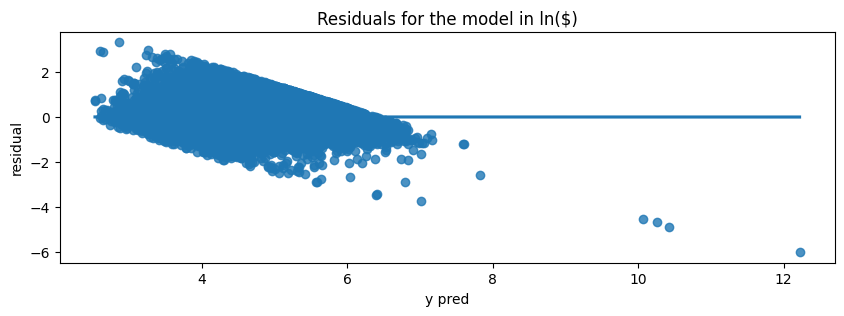

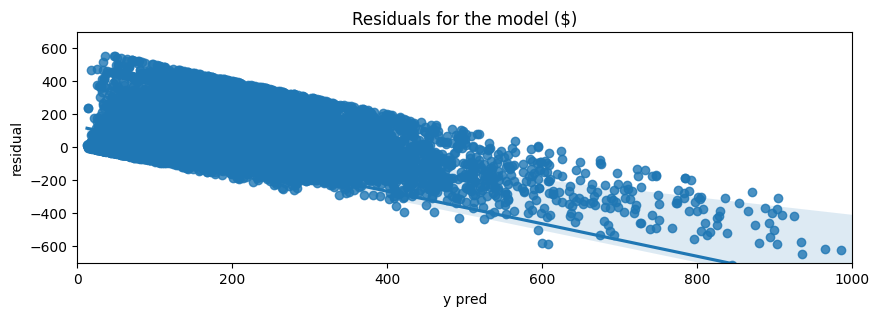

In [54]:
linearReg(train_cols_amens, train_df_new, test_df_new, 'log_price')

(485050, 60)
(485050,)
(121562, 60)
(121562,)
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'amsterdam',
       'athens', 'barcelona', 'berlin', 'dublin', 'lisbon', 'london', 'paris',
       'rome', 'a few days or more', 'within a day', 'within a few hours',
       'within an hour', 'Entire home/apt', 'Hotel room', 'Private room',
       'Shared room', 'Entire condo', 'Entire home', 'Entire rental unit',
       'Private room in home', 'Private room in rental unit', 'other_prop

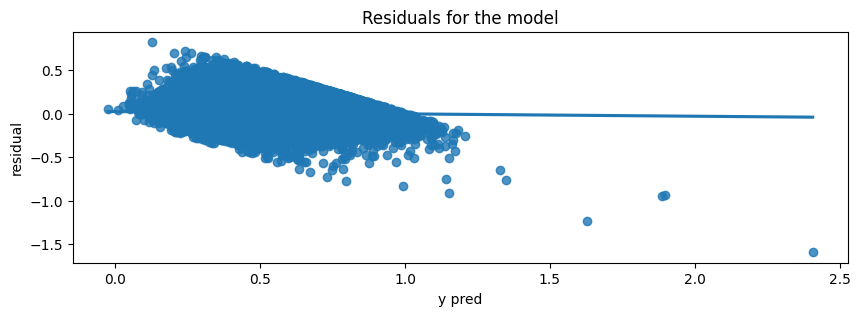

In [ ]:
resids = linearReg(train_cols, scaled_train, scaled_test, 'log_price')

More Residual analysis

In [ ]:
type(resids)

numpy.ndarray

In [ ]:
resid_tf = np.logical_or(resids < -0.75, resids > 0.8 )

In [ ]:
indices = np.nonzero(resid_tf)[0]

In [ ]:
indices

array([ 12119,  17619,  21857,  39619,  50015,  75044,  78663,  96245,
       113070])

In [ ]:
high_residual = all_test_data.iloc[indices]

In [ ]:
high_residual.loc[:,["price", "city", "neighborhood_overview"]]

price    city                              neighborhood_overview
12119   457.0   paris  Saint-Germain des Prés is just the best place ...
17619   512.0   paris  Saint-Germain des Prés is just the best place ...
21857   111.0    rome  Piazza Navona<br />Campo de Fiori<br />Trasvet...
39619    26.0  lisbon  Just one minute walking distance, there is the...
50015    50.0  athens                                                NaN
75044    19.0  berlin  All our flats are situated within, and surroun...
78663   483.0  athens                                                NaN
96245   279.0   paris  Saint-Germain des Prés is just the best place ...
113070   11.0  dublin  My place is located on Middle Abbey Street in ...

In [ ]:
high_residual.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/high_residual_df.csv', index=False)

# Time Analysis (Seasons)

In [ ]:
train_df['last_scraped'].unique()

array(['2023-06-08', '2023-06-10', '2023-03-27', '2022-09-16',
       '2023-03-15', '2022-12-13', '2022-09-14', '2023-06-09',
       '2023-03-14', '2023-06-07', '2022-12-11', '2022-12-10',
       '2022-12-22', '2023-06-13', '2022-12-12', '2022-09-20',
       '2023-03-20', '2022-12-16', '2023-09-03', '2023-09-04',
       '2023-03-19', '2023-03-16', '2023-06-22', '2023-06-06',
       '2022-12-27', '2022-12-17', '2023-03-28', '2022-12-05',
       '2023-03-13', '2023-06-26', '2022-09-13', '2023-03-10',
       '2022-09-15', '2023-06-05', '2023-06-23', '2023-06-11',
       '2023-03-09', '2022-12-21', '2023-06-25', '2022-12-28',
       '2023-03-29', '2023-06-12', '2023-03-24', '2022-10-02',
       '2023-04-02'], dtype=object)

So the possible months are: december, june, march, september, october, april

Going to split into four possible "date" categories: winter (12), spring (03,04), summer(06), fall(09, 10))

In [ ]:
#extract month part
train_df['last_scraped'][0][5:7]

'06'

In [ ]:
def encode_date(date):
  # print(date)
  month = date[5:7]
  if month == '12':
    return "winter"
  elif month == '09' or month == '10':
    return "fall"
  elif month == '06':
    return "summer"
  else:
    return "spring"

In [ ]:
train_df['season'] = train_df['last_scraped'].apply(encode_date)
test_df['season'] = test_df['last_scraped'].apply(encode_date)

train_df['season'] = train_df['season'].astype('category')
test_df['season'] = test_df['season'].astype('category')

In [ ]:
season_dummies = pd.get_dummies(train_df.season)
season_dummies_test = pd.get_dummies(test_df.season)

train_df = pd.concat([train_df, season_dummies], axis=1)
test_df = pd.concat([test_df, season_dummies_test], axis=1)

In [ ]:
# save!
train_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/All_Train_FinalEng.csv', index=False)
test_df.to_csv(r'/content/drive/My Drive/Airbnb_Price_Data/All_Test_FinalEng.csv', index=False)

Check results of season encoding

In [ ]:
train_df.loc[10:20, ['last_scraped', 'season', 'winter', 'spring', 'summer', 'fall']]

last_scraped  season  winter  spring  summer  fall
10   2023-06-07  summer       0       0       1     0
11   2022-12-11  winter       1       0       0     0
12   2023-06-09  summer       0       0       1     0
13   2022-12-13  winter       1       0       0     0
14   2022-12-13  winter       1       0       0     0
15   2022-12-10  winter       1       0       0     0
16   2023-03-14  spring       0       1       0     0
17   2023-06-09  summer       0       0       1     0
18   2022-12-22  winter       1       0       0     0
19   2023-06-13  summer       0       0       1     0
20   2022-09-14    fall       0       0       0     1

In [ ]:
train_df['season'].value_counts()

summer    155621
spring    145261
winter    145097
fall       39121
Name: season, dtype: int64

In [ ]:
train_df.groupby(['season'])['price'].mean()

season
fall      119.711076
spring    127.081763
summer    142.362798
winter    120.360769
Name: price, dtype: float64

Box Plot for Price By Season

<Axes: xlabel='season', ylabel='price'>

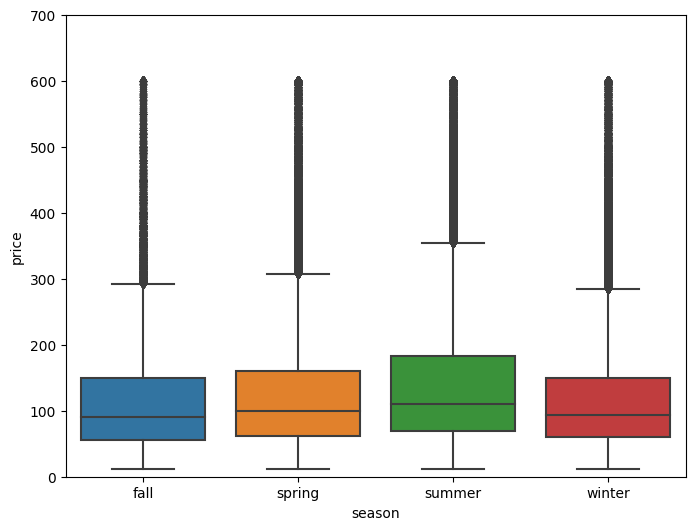

In [ ]:
plt.figure(figsize=(8, 6))
plt.ylim((0, 700))
sns.boxplot(data=train_df, x = 'season', y = 'price')

In [ ]:
# group by city, then season, get stats
train_df.groupby(["city", "season"])["price"].mean()

city       season
amsterdam  fall      225.199730
           spring    202.177156
           summer    221.839269
           winter    196.610481
athens     fall       80.012147
           spring     77.275679
           summer     93.115621
           winter     79.955999
barcelona  fall             NaN
           spring    125.237741
           summer    154.395021
           winter     99.407934
berlin     fall       91.670575
           spring     94.299885
           summer    108.525724
           winter     86.881012
dublin     fall             NaN
           spring    147.724985
           summer    143.846420
           winter    129.678724
lisbon     fall      120.224390
           spring    108.215248
           summer    129.434217
           winter    100.967705
london     fall             NaN
           spring    127.159774
           summer    135.747545
           winter    128.336168
paris      fall             NaN
           spring    139.850080
           summer    1

Linear Regression With Seasons Added

In [55]:
train_cols_seasons = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                          'host_has_profile_pic', 'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'amsterdam', 'athens', 'barcelona', 'berlin', 'dublin', 'lisbon',
                          'london', 'paris', 'rome', 'a few days or more',
                          'within a day', 'within a few hours', 'within an hour',
                          'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Entire condo', 'Entire home', 'Entire rental unit', 'Private room in home', 'Private room in rental unit', 'other_prop', 'attr_score',
                          'amenity_ Hair dryer','amenity_ Iron','amenity_ Dishes and silverware','amenity_ Cooking basics','amenity_ Refrigerator','amenity_ Smoke alarm','amenity_ Bed linens','amenity_ Microwave','amenity_ Carbon monoxide alarm','amenity_ Dedicated workspace', 'winter', 'spring', 'summer', 'fall']

Elapsed time:  6.105949878692627
Train R-sq:  0.5808947707711504
Test R-sq:  0.579852778477379
MAE: 0.3526869807681107
MSE: 0.20758527337660723
RMSE: 0.4556152690336522
MAE ($): 47.324723781399875
 ------------------------------------------ 
+----+--------------------------------+---------------+---------------------+
|    | Feature                        |   Coefficient |   Weight_Percentage |
|----+--------------------------------+---------------+---------------------|
| 23 | athens                         |  -0.851779    |         11.0926     |
| 38 | Shared room                    |  -0.622462    |          8.10627    |
| 22 | amsterdam                      |   0.545258    |          7.10084    |
| 36 | Hotel room                     |   0.497678    |          6.48122    |
| 42 | Private room in home           |  -0.461404    |          6.00882    |
| 43 | Private room in rental unit    |  -0.375244    |          4.88677    |
| 26 | dublin                         |   0.319788    | 

array([ 0.09078561,  0.46442058, -0.64539651, ..., -0.41868156,
        0.3610123 ,  0.19965433])

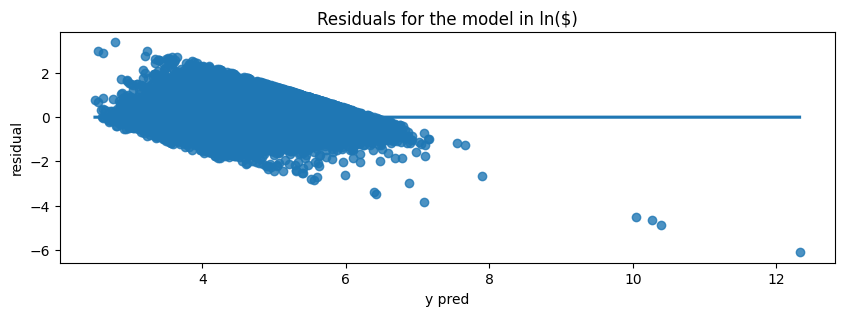

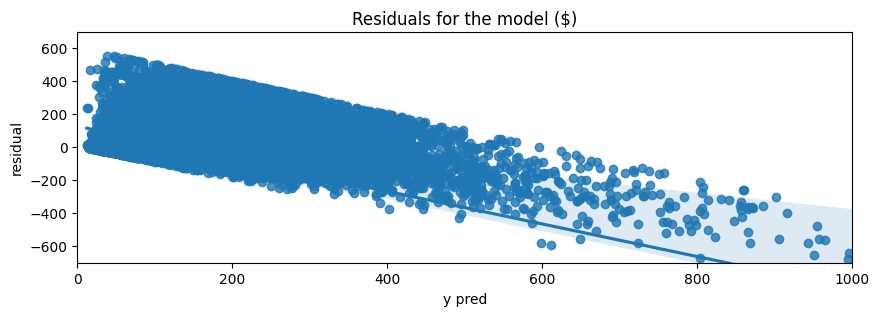

In [56]:
linearReg(train_cols_seasons, train_df_new, test_df_new, 'log_price')

# Ridge

First attempt

In [ ]:
from sklearn.linear_model import Ridge

x_train_ridge = train_df[train_cols]
y_train_ridge = train_df['log_price']
x_test = test_df[train_cols]
y_test = test_df['log_price']

ridge = Ridge(alpha=0.01
              )
ridge.fit(x_train_ridge, y_train_ridge)
y_pred = ridge.predict(x_test)

# compute r-squared
# on test data
r2_test = r2_score(y_test, y_pred)
print("Test R-sq: ", r2_test)

  # compute errors
y_test = y_test.values.squeeze()
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Test R-sq:  0.5176563936854212
MAE: 0.38145484175107364
MSE: 0.2399478080990332
RMSE: 0.4898446775244508


With cross Validation

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from numpy import arange

x_train_ridge = all_train_data[train_cols_props]
y_train_ridge = all_train_data['log_price']
x_test = all_test_data[train_cols_props]
y_test = all_test_data['log_price']

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=8, n_repeats=5, random_state=1)

#define model
ridge_cv = RidgeCV(alphas=arange(0.01, 0.72, 0.1), cv=cv)

#fit model
ridge_cv.fit(x_train_ridge, y_train_ridge)

#display lambda that produced the lowest test MSE
print(ridge_cv.alpha_)

0.7100000000000001


In [ ]:
# with scaled data
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from numpy import arange

x_train_ridge = scaled_train[train_cols]
y_train_ridge = scaled_train['log_price']
x_test = scaled_test[train_cols]
y_test = scaled_test['log_price']

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=8, n_repeats=5, random_state=1)

#define model
ridge_cv = RidgeCV(alphas=arange(0.01, 0.72, 0.1), cv=cv)

#fit model
ridge_cv.fit(x_train_ridge, y_train_ridge)

#display lambda that produced the lowest test MSE
print(ridge_cv.alpha_)

0.31000000000000005


Final model and results

In [32]:
from sklearn.linear_model import Ridge

x_train_ridge = scaled_train_data[train_cols]
y_train_ridge = scaled_train_data['log_price']
x_test = scaled_test_data[train_cols]
y_test = scaled_test_data['log_price']

ridge = Ridge(alpha=0.3)
start = time.time()
ridge.fit(x_train_ridge, y_train_ridge)
stop = time.time()
print("time elapsed:", (stop - start))
y_pred = ridge.predict(x_test)
y_pred_train = ridge.predict(x_train_ridge)

# compute r-squared
# on test data
r2_test = r2_score(y_test, y_pred)
print("Test R-sq: ", r2_test)
r2_train = r2_score(y_train_ridge, y_pred_train)
print("Train R-sq: ", r2_train)

  # compute errors
y_test = y_test.values.squeeze()
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

 # dollar errors
y_pred_dollar = np.exp(y_pred)
y_test_dollar = np.exp(y_test)
resid_dollar = y_test_dollar - y_pred_dollar
mae_dol = mean_absolute_error(y_true=y_test_dollar,y_pred=y_pred_dollar)

print("MAE ($):", mae_dol)

print("coefficients:")

 # coefficients
ridge_coef = pd.DataFrame(list(zip(train_cols,(ridge.coef_))),columns=['Feature','Coefficient'])

# absolute value importances
ridge_coef['abs_Coefficient'] = abs(ridge_coef['Coefficient'])
coeff_sum = ridge_coef['abs_Coefficient'].sum()
ridge_coef['Weight_Percentage'] = ridge_coef['abs_Coefficient'] / coeff_sum * 100
ridge_coef = ridge_coef.drop(columns=['abs_Coefficient'])
print(tabulate(ridge_coef.sort_values(by='Weight_Percentage',ascending=False), headers='keys',tablefmt='psql'))

model_dict = {}
model_dict['mae'],model_dict['mse'],model_dict['rmse'], model_dict['train_r2'], model_dict['test_r2'], model_dict['mae_dol'] = mae, mse, rmse, r2_train, r2_test, mae_dol
model_metrics['ridge0.3'] = model_dict

time elapsed: 0.45629191398620605
Test R-sq:  0.5906828227170045
Train R-sq:  0.5926688116967587
MAE: 0.34766020660612207
MSE: 0.20223439259244777
RMSE: 0.4497047838220623
MAE ($): 48.07522361042907
coefficients:
+----+-----------------------------------+---------------+---------------------+
|    | Feature                           |   Coefficient |   Weight_Percentage |
|----+-----------------------------------+---------------+---------------------|
|  5 | accommodates                      |   0.252002    |           9.35495   |
| 23 | athens                            |  -0.213855    |           7.93883   |
| 45 | attr_score                        |   0.153032    |           5.68094   |
| 22 | amsterdam                         |   0.103636    |           3.84724   |
| 18 | review_scores_value               |  -0.0865383   |           3.21252   |
| 14 | review_scores_cleanliness         |   0.0850481   |           3.1572    |
| 28 | london                            |   0.077734    |

# Lasso Regression

In [61]:
# with scaled data
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from numpy import arange

x_train_lasso = scaled_train_data[train_cols]
y_train_lasso = scaled_train_data['log_price']
x_test = scaled_test_data[train_cols]
y_test = scaled_test_data['log_price']

alphas = np.arange(0.001, 0.02, 0.005)

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

#define model
lasso_cv = LassoCV(alphas=arange(0.001, 0.02, 0.005), cv=cv)

#fit model
lasso_cv.fit(x_train_lasso, y_train_lasso)

#display lambda that produced the lowest test MSE
print(lasso_cv.alpha_)

0.001


In [67]:
lasso = Lasso(alpha=0.001, random_state=0)
start = time.time()
lasso.fit(x_train_lasso,y_train_lasso)
stop=time.time()
print("time elapsed: ", (stop - start))

time elapsed:  124.23267674446106


In [63]:
# save
import joblib
joblib.dump(lasso,'/content/drive/My Drive/Airbnb_Price_Data/lasso.001_model.joblib')

['/content/drive/My Drive/Airbnb_Price_Data/lasso.001_model.joblib']

In [33]:
import joblib
# load a saved model
lasso = joblib.load('/content/drive/My Drive/Airbnb_Price_Data/lasso.001_model.joblib')

In [35]:
x_train_lasso = scaled_train_data[train_cols]
y_train_lasso = scaled_train_data['log_price']
x_test = scaled_test_data[train_cols]
y_test = scaled_test_data['log_price']
y_pred_test = lasso.predict(x_test)
y_pred_train = lasso.predict(x_train_lasso)

# compute r-squared
# on train data
r2_train = r2_score(y_train_lasso, y_pred_train)
print("Train R-sq: ", r2_train)
# on test data
r2_test = r2_score(y_test, y_pred_test)
print("Test R-sq: ", r2_test)

  # compute errors
# y_test = y_test.values.squeeze()
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_test)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_test)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_test,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
 # dollar errors
y_pred_dollar = np.exp(y_pred_test)
y_test_dollar = np.exp(y_test)
resid_dollar = y_test_dollar - y_pred_dollar
mae_dol = mean_absolute_error(y_true=y_test_dollar,y_pred=y_pred_dollar)

print("MAE ($):", mae_dol)

Train R-sq:  0.5924883843113371
Test R-sq:  0.5904783278698961
MAE: 0.3478844430211928
MSE: 0.20233542888774267
RMSE: 0.4498171060417141
MAE ($): 47.792027099462366


In [36]:
model_dict = {}
model_dict['mae'],model_dict['mse'],model_dict['rmse'], model_dict['train_r2'], model_dict['test_r2'], model_dict['mae_dol'] = mae, mse, rmse, r2_train, r2_test, mae_dol
model_metrics['lasso.001'] = model_dict

In [71]:
coefficients = lasso.coef_
print("Lasso Regression Coefficient Table")
lasso_coef_df = pd.DataFrame(list(zip(train_cols,(coefficients))),columns=['Feature','Coefficient'])

# absolute value importances
lasso_coef_df['abs_Coefficient'] = abs(lasso_coef_df['Coefficient'])
coeff_sum = lasso_coef_df['abs_Coefficient'].sum()
lasso_coef_df['Weight_Percentage'] = lasso_coef_df['abs_Coefficient'] / coeff_sum * 100
lasso_coef_df = lasso_coef_df.drop(columns=['abs_Coefficient'])
print(tabulate(lasso_coef_df.sort_values(by='Weight_Percentage',ascending=False), headers='keys',tablefmt='psql'))

Lasso Regression Coefficient Table
+----+-----------------------------------+---------------+---------------------+
|    | Feature                           |   Coefficient |   Weight_Percentage |
|----+-----------------------------------+---------------+---------------------|
|  5 | accommodates                      |   0.248272    |           9.61457   |
| 23 | athens                            |  -0.190383    |           7.37275   |
| 45 | attr_score                        |   0.150205    |           5.81685   |
| 22 | amsterdam                         |   0.12021     |           4.65525   |
| 28 | london                            |   0.112249    |           4.34695   |
| 29 | paris                             |   0.0996269   |           3.85814   |
| 18 | review_scores_value               |  -0.0845135   |           3.27286   |
| 35 | Entire home/apt                   |   0.0833283   |           3.22697   |
| 14 | review_scores_cleanliness         |   0.0815146   |           3.156

# Random Forest Regression

https://stackoverflow.com/questions/38151615/specific-cross-validation-with-random-forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Parameter tuning https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [60, 80, 105], # number of trees, default is 100
    'max_depth': [3, 5, 7]
}

rf = RandomForestRegressor()

x_train_forest = all_train_data[train_cols]
y_train_forest = all_train_data['log_price']

grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(x_train_forest, y_train_forest)

SAVE!

In [ ]:
import joblib

# save the model with the selected file name
joblib.dump(grid_rf,'grid_rf_model_all.joblib')

In [ ]:
print(grid_rf.best_estimator_)

In [ ]:
print(grid_rf.best_params_)

In [ ]:
print(grid_rf.cv_results_)

In [ ]:
joblib.dump(grid_rf,'/content/drive/My Drive/Airbnb_Price_Data/grid_rf_model.joblib')

In [72]:
import joblib
# load a saved model
loaded_rf = joblib.load('/content/drive/My Drive/Airbnb_Price_Data/grid_rf_model.joblib')
loaded_rf_base = joblib.load('/content/drive/My Drive/Airbnb_Price_Data/grid_rf_basemodel.joblib')

In [73]:
loaded_rf.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=105)

Further tuning with smaller sample

In [ ]:
train_small = all_train_data.sample(frac=0.5, random_state=1)
print(train_small.shape)
x_train_small = train_small[train_cols]
y_train_small = train_small['log_price']

(242525, 78)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [85, 120, 150],
    'max_depth': [6, 7, 9]
}

rf = RandomForestRegressor()

x_train_forest = all_train_data[train_cols]
y_train_forest = all_train_data['log_price']

grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(x_train_small, y_train_small)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 9],
                         'n_estimators': [85, 120, 150]})

In [ ]:
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)
rf_tuned = grid_rf.best_estimator_

{'max_depth': 9, 'n_estimators': 150}
RandomForestRegressor(max_depth=9, n_estimators=150)


In [ ]:
joblib.dump(grid_rf,'/content/drive/My Drive/Airbnb_Price_Data/grid_rf_2.joblib')

['/content/drive/My Drive/Airbnb_Price_Data/grid_rf_2.joblib']

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_best = RandomForestRegressor(max_depth=9, n_estimators=150)
start = time.time()
rf_best.fit(train_df_new[train_cols], train_df_new['log_price'])
stop = time.time()
print("time elapsed: ", (stop-start))

time elapsed:  779.4672429561615


In [43]:
joblib.dump(rf_best,'/content/drive/My Drive/Airbnb_Price_Data/rf_best.joblib')

['/content/drive/My Drive/Airbnb_Price_Data/rf_best.joblib']

In [40]:
rf_best = joblib.load('/content/drive/My Drive/Airbnb_Price_Data/rf_best.joblib')

Analyze

In [44]:
x_train_forest = train_df_new[train_cols]
y_train_forest = train_df_new['log_price']
x_test_forest = test_df_new[train_cols]
y_test = test_df_new['log_price']
y_pred_forest = rf_best.predict(x_test_forest)
y_pred_train = rf_best.predict(x_train_forest)

# # compute r-squared
# # on test data
r2_test = r2_score(y_test, y_pred_forest)
r2_train = r2_score(y_train_forest, y_pred_train)
print("Train R-sq: ", r2_train)
print("Test R-sq: ", r2_test)

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_forest)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_forest)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_forest,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
 # dollar errors
y_pred_dollar = np.exp(y_pred_forest)
y_test_dollar = np.exp(y_test)
resid_dollar = y_test_dollar - y_pred_dollar
mae_dol = mean_absolute_error(y_true=y_test_dollar,y_pred=y_pred_dollar)

print("MAE ($):", mae_dol)

Train R-sq:  0.6062865830426518
Test R-sq:  0.5995569141424395
MAE: 0.34317727965462863
MSE: 0.19784990401284452
RMSE: 0.444803219427248
MAE ($): 43.31464419090231


In [76]:
rf_importances = rf_best.feature_importances_
feat_names = train_cols
tree_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
tree_result['importance'] = tree_result['importance'] * 100
print(tabulate(tree_result.sort_values(by='importance',ascending=False), headers='keys', tablefmt='psql'))
print("sum:", tree_result['importance'].sum())

+----+-----------------------------------+--------------+
|    | feature                           |   importance |
|----+-----------------------------------+--------------|
|  5 | accommodates                      | 35.8862      |
| 37 | Private room                      | 12.6923      |
| 10 | number_of_reviews_ltm             |  9.385       |
|  6 | bathrooms                         |  7.32086     |
| 23 | athens                            |  6.77017     |
| 45 | attr_score                        |  3.62256     |
| 22 | amsterdam                         |  3.31448     |
| 64 | Room in boutique hotel            |  2.31        |
|  7 | bedrooms                          |  2.24501     |
| 17 | review_scores_location            |  2.13086     |
| 38 | Shared room                       |  2.03462     |
| 27 | lisbon                            |  2.00762     |
| 65 | Room in hotel                     |  1.42875     |
| 20 | calculated_host_listings_count    |  1.42459     |
| 51 | amenity

In [45]:
# save rf metrics
model_dict = {}
model_dict['mae'],model_dict['mse'],model_dict['rmse'], model_dict['train_r2'], model_dict['test_r2'], model_dict['mae_dol']= mae, mse, rmse, r2_train, r2_test, mae_dol
model_metrics['rf_best'] = model_dict

Residual Plot

Text(0, 0.5, 'residual')

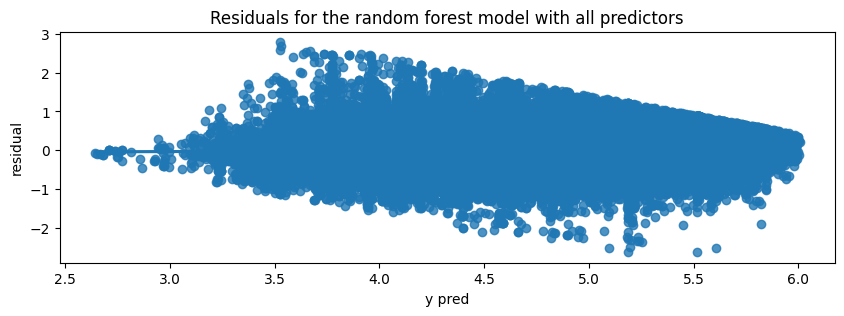

In [78]:
residuals = y_test - y_pred_forest
fig = plt.figure(figsize=(10,3))
sns.regplot(x=y_pred_forest, y=residuals)
plt.title("Residuals for the random forest model with all predictors")
plt.xlabel("y pred")
plt.ylabel("residual")

<Axes: title={'center': 'Random Forest Top 10 Important Features'}, xlabel='feature'>

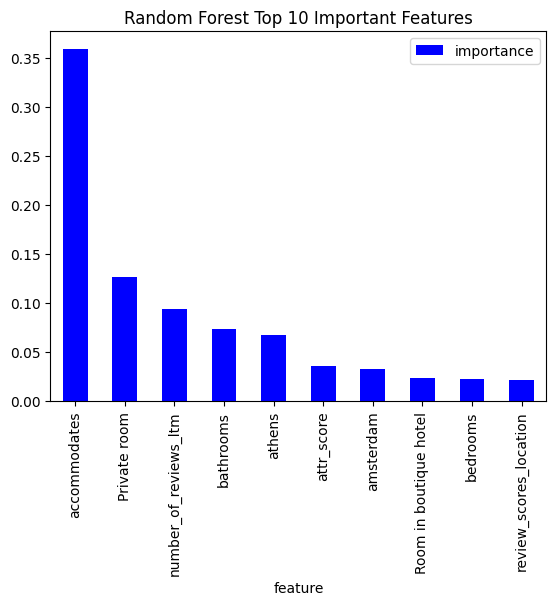

In [79]:
#Plot variable importances for the top 10 predictors
importances = rf_best.feature_importances_
feat_names = train_cols
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='blue', title='Random Forest Top 10 Important Features')

On base numerical features

In [8]:
x_train_base = train_df_new[train_cols_numer]
y_train_forest = train_df_new['log_price']
x_test_base = test_df_new[train_cols_numer]
y_test = test_df_new['log_price']

rf_base = RandomForestRegressor(max_depth=9, n_estimators=150)
rf_base.fit(x_train_base, y_train_forest)

y_pred_forest = rf_base.predict(x_test_base)
y_pred_train = rf_base.predict(x_train_base)

# # compute r-squared
# # on test data
r2_test = r2_score(y_test, y_pred_forest)
r2_train = r2_score(y_train_forest, y_pred_train)
print("Train R-sq: ", r2_train)
print("Test R-sq: ", r2_test)

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_forest)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_forest)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_forest,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Train R-sq:  0.553527792397581
Test R-sq:  0.5455548244407067
MAE: 0.36900925140946156
MSE: 0.22453111949968482
RMSE: 0.47384714782267584


Add in new extra_beds features

In [ ]:
all_train_data['extra_beds'] = all_train_data['beds'] > 7
all_test_data['extra_beds'] = all_test_data['beds'] > 7

In [ ]:
all_train_data['extra_beds'].head()

0    False
1    False
2    False
3    False
4    False
Name: extra_beds, dtype: bool

# XGBOOST

In [22]:
import xgboost
def run_xgb(xgb_model, train_df, test_df, train_cols, target):
  x_train_xgb = train_df[train_cols]
  y_train_xgb = train_df[target]
  x_test_xgb = test_df[train_cols]
  y_test_xgb = test_df[target]

  # fit model
  start = time.time()
  xgb_model.fit(x_train_xgb, y_train_xgb)
  stop = time.time()
  print("elapsed time:", (stop - start))

  #calculate predictions
  y_train_preds = xgb_model.predict(x_train_xgb)
  y_test_preds = xgb_model.predict(x_test_xgb)

  # compute r-squared
  r2_test = r2_score(y_test_xgb, y_test_preds)
  r2_train = r2_score(y_train_xgb, y_train_preds)
  print("Train R-sq: ", r2_train)
  print("Test R-sq: ", r2_test)

  # errors
  mae = mean_absolute_error(y_true=y_test_xgb,y_pred=y_test_preds)
  mse = mean_squared_error(y_true=y_test_xgb,y_pred=y_test_preds)
  rmse = mean_squared_error(y_true=y_test_xgb,y_pred=y_test_preds,squared=False)

  print("MAE:",mae)
  print("MSE:",mse)
  print("RMSE:",rmse)

  # dollar errors
  y_pred_dollar = np.exp(y_test_preds)
  y_test_dollar = np.exp(y_test_xgb)
  resid_dollar = y_test_dollar - y_pred_dollar

  mae_dol = mean_absolute_error(y_true=y_test_dollar,y_pred=y_pred_dollar)

  print("MAE ($):", mae_dol)

  # log residual plot
  log_residuals = y_test_xgb - y_test_preds
  fig = plt.figure(figsize=(10,3))
  sns.regplot(x=y_test_preds, y=log_residuals)
  plt.title("Log Residuals for the xgboost model")
  plt.xlabel("log price predicted")
  plt.ylabel("residual")

  # plot feature importances
  importances = xgb_model.feature_importances_
  feat_names = train_cols
  xgb_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
  xgb_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='blue', title='XGBoost Top 10 Important Features ')

  xgb_result['importance'] = xgb_result['importance'] * 100
  print(tabulate(xgb_result.sort_values(by='importance',ascending=False), headers='keys', tablefmt='psql'))

  # save metrics
  model_dict = {}
  model_dict['mae'],model_dict['mse'],model_dict['rmse'], model_dict['train_r2'], model_dict['test_r2'], model_dict['mae_dol']= mae, mse, rmse, r2_train, r2_test, mae_dol
  model_metrics['xgb_base'] = model_dict

Fit hyperparameters on small subset first: inspired by https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
train_small = all_train_data.sample(frac=0.25, random_state=1)
print(train_small.shape)
x_train_small = train_small[train_cols]
y_train_small = train_small['log_price']

(121262, 78)


First run: find optimal number of trees

In [ ]:
import xgboost
xgb1 = xgboost.XGBRegressor(learning_rate = 0.3, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.8, nthread=-1,seed=25)
xgb_param = xgb1.get_xgb_params()
xgtrain = xgboost.DMatrix(x_train_small.values, label=y_train_small.values)
xgb_cv = xgboost.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5, metrics='rmse', early_stopping_rounds=50)
print(xgb_cv)
print(xgb_cv.shape[0])

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0           0.616106        0.000328        0.616499       0.001095
1           0.562995        0.000326        0.563704       0.001152
2           0.524013        0.000335        0.525014       0.001011
3           0.500212        0.000777        0.501601       0.000720
4           0.483682        0.000883        0.485260       0.001067
..               ...             ...             ...            ...
800         0.284939        0.000341        0.377338       0.001949
801         0.284868        0.000356        0.377325       0.001956
802         0.284781        0.000374        0.377315       0.001953
803         0.284716        0.000381        0.377309       0.001952
804         0.284645        0.000388        0.377304       0.001960

[805 rows x 4 columns]
805


Will continue to use 805 trees

Train R-sq:  0.8240834446752857
Test R-sq:  0.7199182114773957
MAE: 0.2816982773736059
MSE: 0.13865375604036928
RMSE: 0.3723623988003747
Average residual:  7.740288252789634


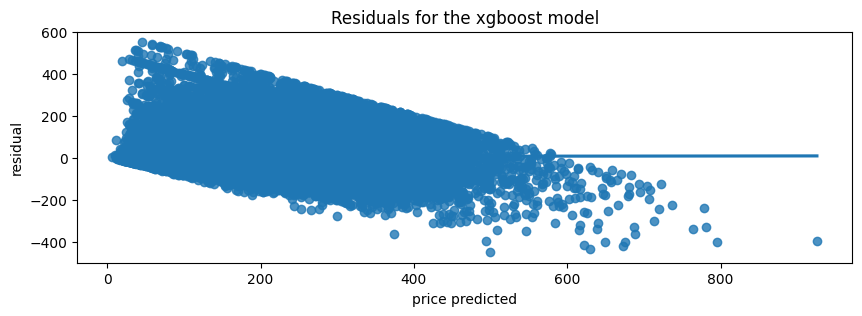

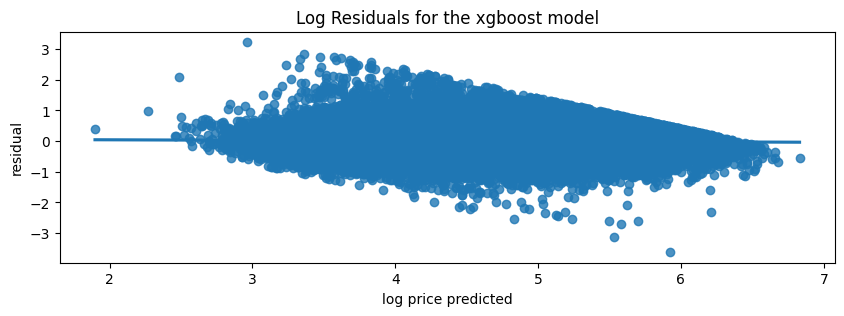

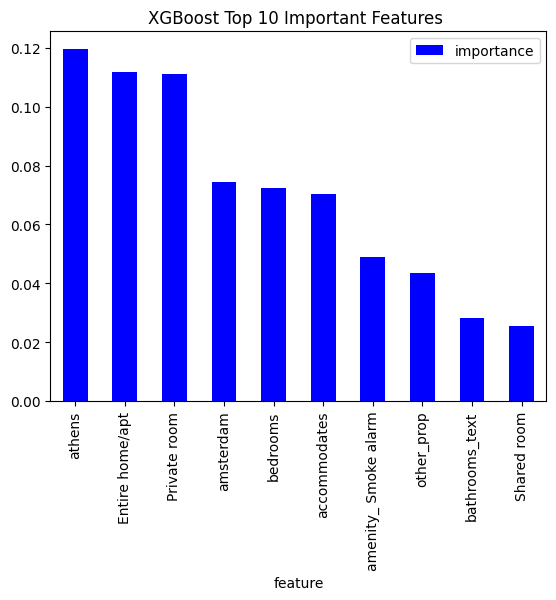

In [ ]:
xgb1.set_params(n_estimators=805)
run_xgb(xgb1, train_small, all_test_data, train_cols, 'log_price')

Tune max_depth and min_child_weight

In [ ]:
from sklearn.model_selection import GridSearchCV
params1 = {
 'max_depth':[3, 5, 7, 10],
 'min_child_weight':range(1,6,2)
}
grid1 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.3, n_estimators=805, max_depth=5,
 min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.8, n_jobs=-1, seed=25),
 param_grid = params1, scoring='r2',n_jobs=-1, cv=5)
grid1.fit(x_train_small,y_train_small)
# print(grid1.grid_scores_, grid1.best_params_, grid1.best_score_)
# save grid
joblib.dump(grid1,'/content/drive/My Drive/Airbnb_Price_Data/grid_xgb1.joblib')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


['/content/drive/My Drive/Airbnb_Price_Data/grid_xgb1.joblib']

In [ ]:
params2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
grid2 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.3, n_estimators=805, max_depth=5,
 min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.8, n_jobs=-1, seed=25),
 param_grid = params2, scoring='r2',n_jobs=-1, cv=5)
grid2.fit(x_train_small,y_train_small)
# print(grid1.grid_scores_, grid1.best_params_, grid1.best_score_)
# save grid
joblib.dump(grid2,'/content/drive/My Drive/Airbnb_Price_Data/grid_xgb2.joblib')

['/content/drive/My Drive/Airbnb_Price_Data/grid_xgb2.joblib']

In [ ]:
print(grid2.best_estimator_)
print(grid2.best_params_)
print(grid2.cv_results_)
print(grid2.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=805, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)
{'max_depth': 5, 'min_child_weight': 4}
{'mean_fit_time': array([24.16869936, 20.60512457, 20.52256598, 29.23902993, 36.84836373,
       25.40832605, 37.65778809, 32.2080442 , 33.13802142]), 'std_fit_time': array([5.47964983, 0.32261041, 0.78709617, 4.74162127, 8.072

elapsed time: 102.69204425811768
Train R-sq:  0.8081865164471017
Test R-sq:  0.7609152886481262
MAE: 0.25953063691109973
MSE: 0.11835826033397889
RMSE: 0.34403235361514894
Average residual:  7.902239907295887
+----+--------------------------------+--------------+
|    | feature                        |   importance |
|----+--------------------------------+--------------|
| 37 | Private room                   |    13.9204   |
| 23 | athens                         |    11.4189   |
| 22 | amsterdam                      |     7.59509  |
|  7 | bedrooms                       |     7.45826  |
|  5 | accommodates                   |     7.22876  |
| 35 | Entire home/apt                |     6.63087  |
| 44 | other_prop                     |     4.02285  |
| 38 | Shared room                    |     3.98978  |
| 51 | amenity_ Smoke alarm           |     3.309    |
|  6 | bathrooms_text                 |     2.85314  |
| 58 | summer                         |     2.82142  |
| 29 | paris         

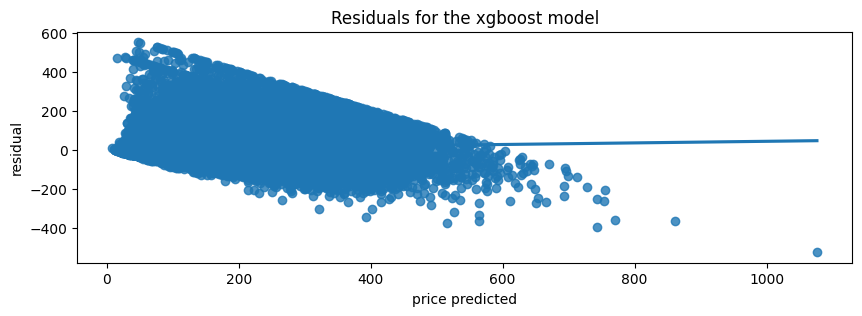

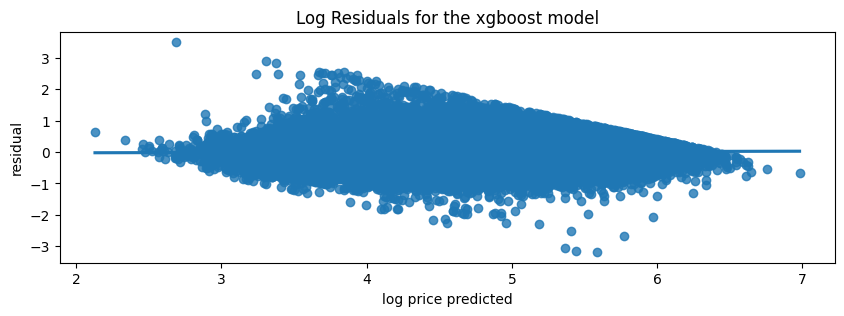

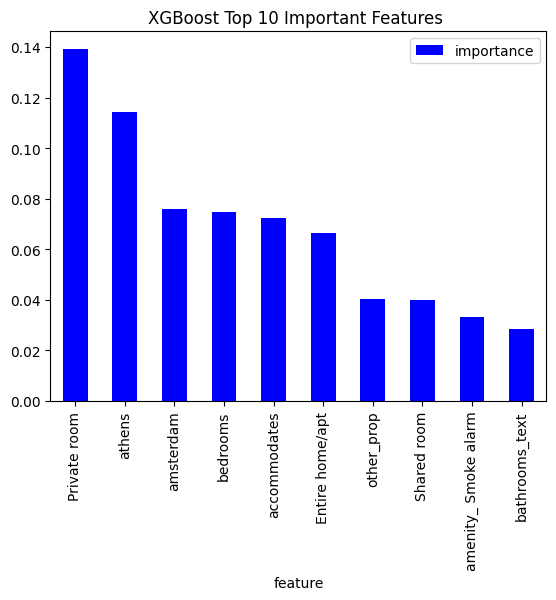

In [ ]:
# xgb_grid1 = grid1.best_estimator_
# run_xgb(xgb_grid1, train_small, all_test_data, train_cols, 'log_price')
# xgb_grid2 = grid2.best_estimator_
# run_xgb(xgb_grid2, train_small, all_test_data, train_cols, 'log_price')
# xgb_grid3 = grid3.best_estimator_
# run_xgb(xgb_grid3, train_small, all_test_data, train_cols, 'log_price')
xgb_grid4 = grid4.best_estimator_
run_xgb(xgb_grid4, all_train_data, all_test_data, train_cols, 'log_price')

Tune Gamma and colsample by tree
- gamma specifies the minimum loss reduction required to make a split
- colsample_bytree is fraction of columns randomly sampled for each tree (typically 0.5-1)

In [ ]:
params3 = {
 'gamma': [0, 0.1, 0.2, 0.3],
 'colsample_bytree': [0.5, 0.6, 0.8, 1]
}
grid3 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.3, n_estimators=805, max_depth=5,
 min_child_weight=4, gamma=0, subsample=1, colsample_bytree=0.8, n_jobs=-1, seed=25),
 param_grid = params3, scoring='r2',n_jobs=-1, cv=5)
grid3.fit(x_train_small,y_train_small)
# print(grid1.grid_scores_, grid1.best_params_, grid1.best_score_)
# save grid
joblib.dump(grid3,'/content/drive/My Drive/Airbnb_Price_Data/grid_xgb3.joblib')

['/content/drive/My Drive/Airbnb_Price_Data/grid_xgb3.joblib']

In [ ]:
print(grid3.best_estimator_)
print(grid3.best_params_)
print(grid3.cv_results_)
print(grid3.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=805, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)
{'colsample_bytree': 0.5, 'gamma': 0}
{'mean_fit_time': array([26.46832299, 16.32028894, 17.20520644, 20.10226183, 24.70741091,
       15.20810852, 13.74515147, 14.1376152 , 23.17234592, 15.38549299,
       13.85821481, 15.04253573, 24.19234991, 14.54466009, 14.11232

reduce learning rate, small tuning on full dataset

In [ ]:
import time
x_train = all_train_data[train_cols]
y_train = all_train_data['log_price']
params4 = {
 'n_estimators': [805, 1000],
 'subsample': [0.5, 0.7, 0.8],
 'max_depth': [5,6],
 'colsample_bytree': [0.5, 0.6, 0.8]
}
grid4 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.2, n_estimators=805, max_depth=5,
 min_child_weight=4, gamma=0, subsample=1, colsample_bytree=0.8, n_jobs=-1, seed=25),
 param_grid = params4, scoring='r2',n_jobs=-1, cv=5)
start = time.time()
grid4.fit(x_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
# save grid
joblib.dump(grid4,'/content/drive/My Drive/Airbnb_Price_Data/grid_xgb4.joblib')

Training time: 11126.593380689621s


['/content/drive/My Drive/Airbnb_Price_Data/grid_xgb4.joblib']

Tune reg_alpha if still overfitting train a lot

In [ ]:
grid4 = joblib.load('/content/drive/My Drive/Airbnb_Price_Data/grid_xgb4.joblib')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:31:58] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [ ]:
print(grid4.best_estimator_)
print(grid4.best_params_)
print(grid4.cv_results_)
# print(grid4.best_score_)
# print(grid4.refit_time_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)
{'colsample_bytree': 0.8, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.8}
{'mean_fit_time': array([105.65117083,  99.81082635,  96.4300055 , 125.12197261,
       124.85759597, 120.48394122, 119.48631086, 111.0682075 ,
       108.80708094, 139.42734041, 135.6

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    n_jobs=-1, # for max use of parallel processors
    cv = 5,
    verbose=True
)
grid_search.fit(x_train_small, y_train_small)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


KeyboardInterrupt: ignored

In [ ]:
import xgboost
x_train_xg = all_train_data[train_cols]
y_train_xg = all_train_data['log_price']
x_test_xg = all_test_data[train_cols]
y_test = all_test_data['log_price']
#train XGBoost model
# n_est n_estimators (Optional[int]) – Number of gradient boosted trees. Equivalent to number of boosting rounds.
# eta : default 0.3 Step size shrinkage used in update to prevent overfitting, shrinks feature weights
# gamma : default = 0, minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be
# subsample default = 1 Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting
# max_depth: default = 6, Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth
# colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed
xgb = xgboost.XGBRegressor(n_estimators=70, learning_rate=0.3, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)
xgb.fit(x_train_xg,y_train_xg)

#calculate predictions
y_train_preds = xgb.predict(x_train_xg)
y_test_preds = xgb.predict(x_test_xg)


In [ ]:
# save model
joblib.dump(xgb,'/content/drive/My Drive/Airbnb_Price_Data/xg_model_all.joblib')

['/content/drive/My Drive/Airbnb_Price_Data/xg_model_all.joblib']

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:26:31] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


Train R-sq:  0.7188707617360679
Test R-sq:  0.7079082248635311
MAE: 0.2885469381339442
MSE: 0.14459926846654578
RMSE: 0.38026210495728574
Average residual:  9.184439154168178


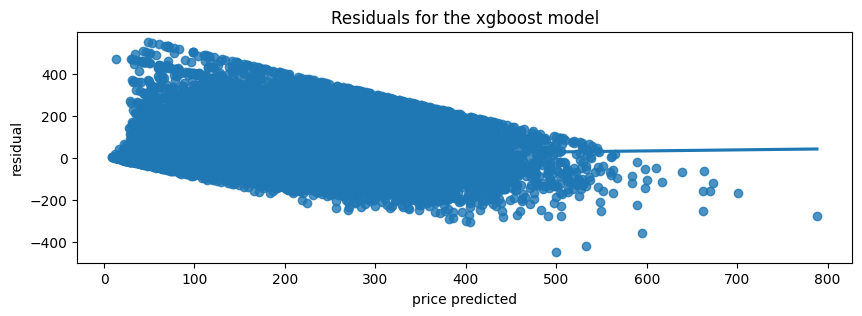

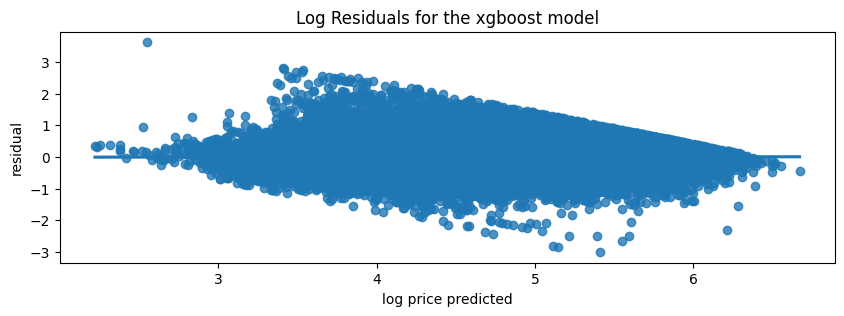

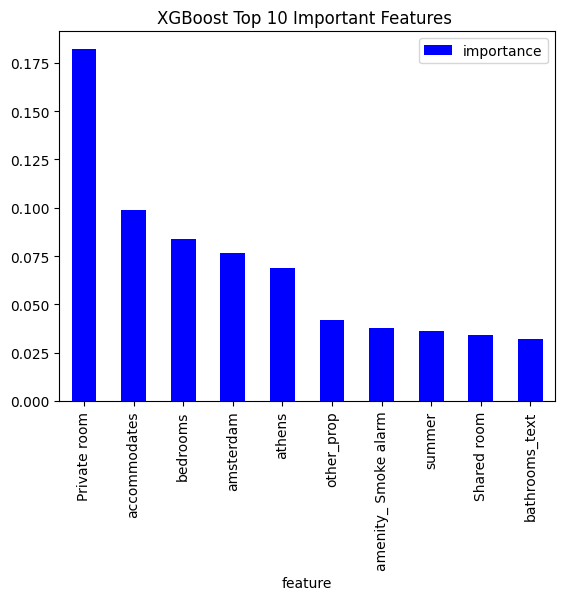

In [ ]:
import joblib
xgb_base1 = joblib.load('/content/drive/My Drive/Airbnb_Price_Data/xg_model_all.joblib')
run_xgb(xgb_base1, all_train_data, all_test_data, train_cols, 'log_price')

elapsed time: 119.2334234714508
Train R-sq:  0.8096130230334985
Test R-sq:  0.7651717387825556
MAE: 0.257607036197727
MSE: 0.116023351587848
RMSE: 0.3406220069047918
Average residual:  7.486171516273394
+----+-----------------------------------+--------------+
|    | feature                           |   importance |
|----+-----------------------------------+--------------|
| 37 | Private room                      |   16.9667    |
| 23 | athens                            |    8.92395   |
| 22 | amsterdam                         |    8.14251   |
| 64 | Room in boutique hotel            |    7.0034    |
|  5 | accommodates                      |    6.94349   |
|  7 | bedrooms                          |    6.52811   |
| 65 | Room in hotel                     |    4.83991   |
| 38 | Shared room                       |    4.11092   |
| 51 | amenity_ Smoke alarm              |    3.12448   |
|  6 | bathrooms                         |    2.40191   |
| 10 | number_of_reviews_ltm             | 

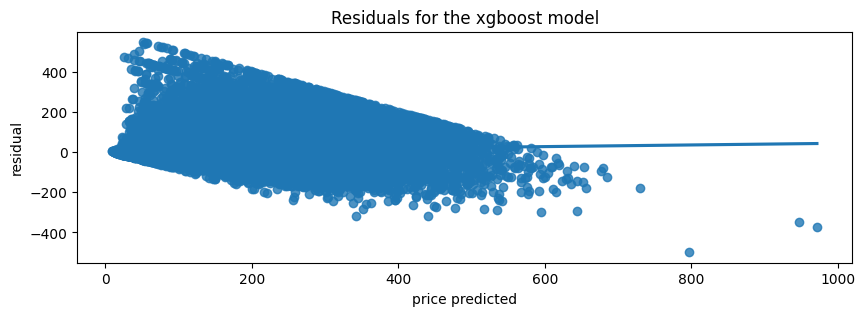

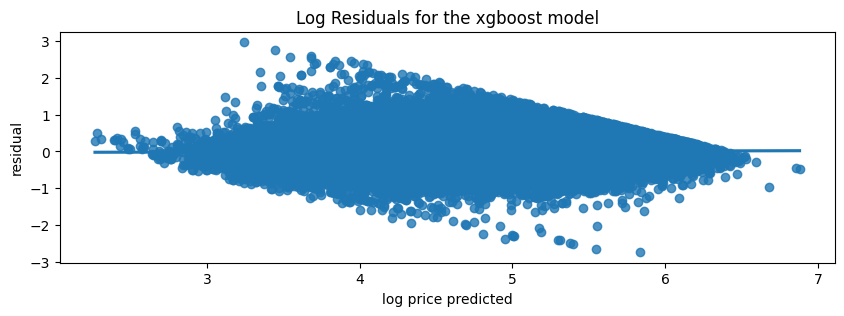

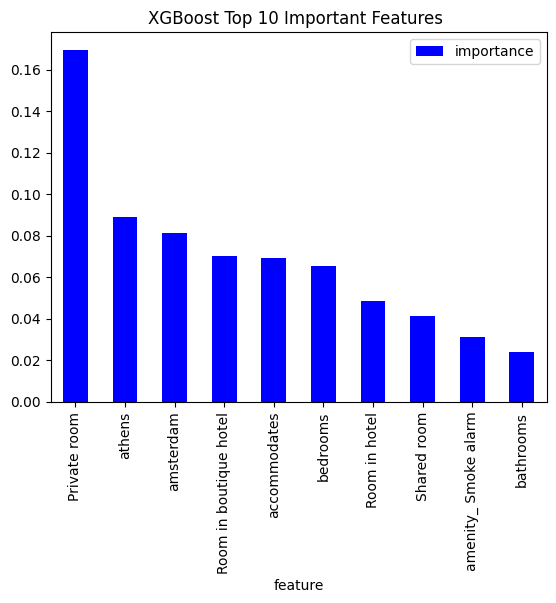

In [ ]:
# with reg_alpha
xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.2, gamma=0, subsample=0.8,
                           colsample_bytree=0.8, max_depth=6, reg_alpha=0.55)
run_xgb(xgb, train_df_new, test_df_new, train_cols_new_props, 'log_price')

## Final XGB evaluation

In [16]:
xgb_grid = joblib.load('/content/drive/My Drive/Airbnb_Price_Data/grid_xgb4.joblib')
xgb_best = xgb_grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:41:45] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [17]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

elapsed time: 102.01800537109375
Train R-sq:  0.811075878850264
Test R-sq:  0.7660102452268329
MAE: 0.2570967086455219
MSE: 0.11560906445099027
RMSE: 0.3400133298136858
MAE ($): 32.83998010629677
+----+-----------------------------------+--------------+
|    | feature                           |   importance |
|----+-----------------------------------+--------------|
| 37 | Private room                      |    19.0764   |
| 23 | athens                            |     8.76005  |
|  7 | bedrooms                          |     8.73832  |
| 22 | amsterdam                         |     8.49874  |
| 64 | Room in boutique hotel            |     5.96786  |
|  5 | accommodates                      |     5.43168  |
| 65 | Room in hotel                     |     3.48513  |
| 38 | Shared room                       |     3.38571  |
| 51 | amenity_ Smoke alarm              |     2.91062  |
| 43 | Private room in rental unit       |     2.81369  |
| 58 | summer                            |     2.1

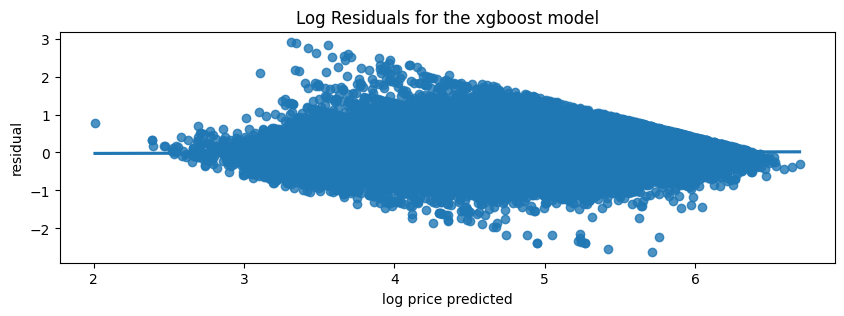

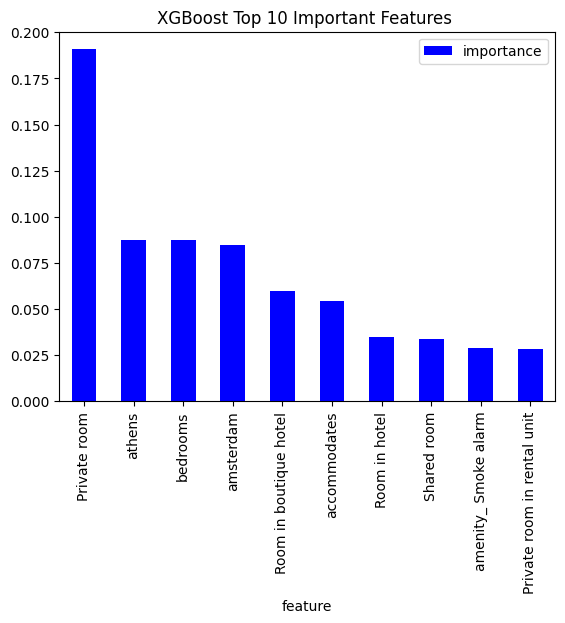

In [21]:
run_xgb(xgb_best, train_df_new, test_df_new, train_cols, 'log_price')

elapsed time: 68.00489354133606
Train R-sq:  0.732078000850946
Test R-sq:  0.6793797777417352
MAE: 0.30531437420553625
MSE: 0.1584112260610703
RMSE: 0.3980090778626416
MAE ($): 38.09374252903739
+----+--------------------------------+--------------+
|    | feature                        |   importance |
|----+--------------------------------+--------------|
| 22 | amsterdam                      |    19.4838   |
|  5 | accommodates                   |    14.9457   |
| 23 | athens                         |    11.8245   |
|  7 | bedrooms                       |    11.396    |
| 29 | paris                          |     7.23962  |
| 27 | lisbon                         |     5.01301  |
| 10 | number_of_reviews_ltm          |     4.73946  |
|  6 | bathrooms                      |     3.55665  |
| 26 | dublin                         |     2.32081  |
| 28 | london                         |     2.24537  |
| 17 | review_scores_location         |     1.95904  |
| 25 | berlin                      

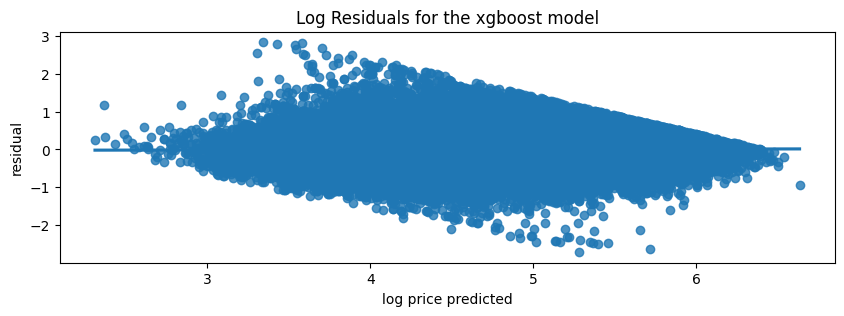

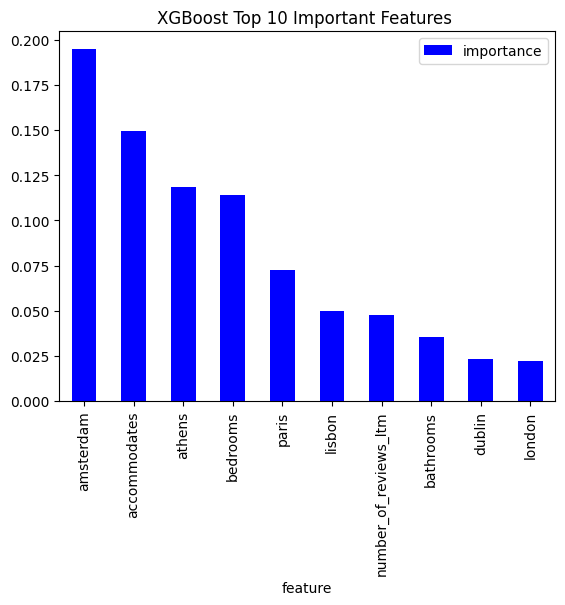

In [23]:
run_xgb(xgb_best, train_df_new, test_df_new, train_cols_numer, 'log_price')

# Final Model Metrics

In [46]:
import pickle
with open('/content/drive/My Drive/Airbnb_Price_Data/final_model_metrics.pkl','wb') as file:
  pickle.dump(model_metrics,file)

In [ ]:
with open('/content/drive/My Drive/Airbnb_Price_Data/final_model_metrics.pkl','rb') as file:
  model_metrics = pickle.load(file)

In [47]:
import pprint
pprint.pprint(model_metrics)

{'lasso.001': {'mae': 0.3478844430211928,
               'mae_dol': 47.792027099462366,
               'mse': 0.20233542888774267,
               'rmse': 0.4498171060417141,
               'test_r2': 0.5904783278698961,
               'train_r2': 0.5924883843113371},
 'lin_reg_all_std': {'mae': 0.34769475246860426,
                     'mae_dol': 47.84228627016096,
                     'mse': 0.2022241439803699,
                     'rmse': 0.44969338885552884,
                     'test_r2': 0.5907035656426414,
                     'train_r2': 0.592656790646656},
 'rf_best': {'mae': 0.34317727965462863,
             'mae_dol': 43.31464419090231,
             'mse': 0.19784990401284452,
             'rmse': 0.444803219427248,
             'test_r2': 0.5995569141424395,
             'train_r2': 0.6062865830426518},
 'ridge0.3': {'mae': 0.34766020660612207,
              'mae_dol': 48.07522361042907,
              'mse': 0.20223439259244777,
              'rmse': 0.4497047838220623,
    